In [339]:
import csv
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as pyplot
import datetime
from scipy.optimize import curve_fit

Function to convert CSV files to pandas DataFrame. Discarding the description sentences on top of each file

In [352]:
def csv2dataframe(fileName):
    newdata=[]
    with open(fileName,'r') as fileData:
        rowData = csv.reader(fileData, 
                           delimiter = ',', 
                           quotechar = '"')
        for data in rowData:
            if len(data)>1:
                newdata.append(data[0:3])
    data_array = np.asarray(newdata)
    
    return convertDateTime(data_array)

First Column of the array is datetime with 'PST' extension. This function strips timezone and converts it into numpy datetime64 format

In [353]:
def convertDateTime(data_array):
    
    firstCol=data_array[1:,0]
    stripFirstCol=[ele.rstrip(' PST') for ele in firstCol]
    
    dateTimeFirstCol=[np.datetime64(ele) for ele in stripFirstCol]
    data_array[1:,0]=dateTimeFirstCol
    data_frame=pd.DataFrame(data_array.reshape(len(data_array),-1))
    
    data_frame.index=data_frame[0]
    data_frame=data_frame.drop(data_frame.columns[0],axis=1)


    data_frame.columns=data_frame.iloc[0]
    data_frame=data_frame.drop(data_frame.index[0])
    
    data_frame=data_frame.astype(str).astype(float)
    data_frame.index=pd.to_datetime(data_frame.index)
    data_frame=data_frame.resample('15T').mean()
    data_frame=data_frame[1:]
    return data_frame

In [354]:
reactivePfile='R3_12_47_1_AMI_residential_phase12_reactive_power.csv'
realPfile='R3_12_47_1_AMI_residential_phase12_real_power.csv'
reactiveVfile='R3_12_47_1_AMI_residential_phase12_reactive_voltage.csv'
realVfile='R3_12_47_1_AMI_residential_phase12_real_voltage.csv'
temperaturefile='R3_12_47_1_climate.csv'

In [330]:
reactivePower=csv2dataframe(reactivePfile)
realPower=csv2dataframe(realPfile)
reactiveVoltage=csv2dataframe(reactiveVfile)
realVoltage=csv2dataframe(realVfile)
temperature=csv2dataframe(temperaturefile)

In [331]:
reactiveP=reactivePower
realP=realPower
reactiveV=reactiveVoltage
realV=realVoltage
amiTemp=temperature

In [389]:
newamiTemp=amiTemp.resample('2.5D').mean()
newamiTemp

# timestamp          temperature
0                               
2013-01-01 00:00:00    49.308031
2013-01-03 12:00:00    55.452590
2013-01-06 00:00:00    50.902542
2013-01-08 12:00:00    52.740743
2013-01-11 00:00:00    53.069018
2013-01-13 12:00:00    55.935892
2013-01-16 00:00:00    53.461269
2013-01-18 12:00:00    45.087642
2013-01-21 00:00:00    47.736771
2013-01-23 12:00:00    53.743740
2013-01-26 00:00:00    63.388871
2013-01-28 12:00:00    63.553443
2013-01-31 00:00:00    51.352493
2013-02-02 12:00:00    52.837693
2013-02-05 00:00:00    53.526967
2013-02-07 12:00:00    59.780443
2013-02-10 00:00:00    55.546745
2013-02-12 12:00:00    58.536921
2013-02-15 00:00:00    50.079546
2013-02-17 12:00:00    49.364391
2013-02-20 00:00:00    49.843220
2013-02-22 12:00:00    51.885916
2013-02-25 00:00:00    58.279445
2013-02-27 12:00:00    68.399692
2013-03-02 00:00:00    62.352545
2013-03-04 12:00:00    59.901720
2013-03-07 00:00:00    56.999644
2013-03-09 12:00:00    54.808067
2013-03-12 00:00:00    64.911167
2013-03-14 12:00:00    71.936591
2013-03-17 00:00:00    72.083995
2013-03-19 12:00:00    65.266417
2013-03-22 00:00:00    64.532168
2013-03-24 12:00:00    68.326471
2013-03-27 00:00:00    66.694196
2013-03-29 12:00:00    73.493693
2013-04-01 00:00:00    73.513572
2013-04-03 12:00:00    70.902771
2013-04-06 00:00:00    68.778027
2013-04-08 12:00:00    71.288996
2013-04-11 00:00:00    67.348826
2013-04-13 12:00:00    76.607620
2013-04-16 00:00:00    74.645073
2013-04-18 12:00:00    64.676421
2013-04-21 00:00:00    63.189802
2013-04-23 12:00:00    73.396747
2013-04-26 00:00:00    73.936950
2013-04-28 12:00:00    76.706197
2013-05-01 00:00:00    78.448847
2013-05-03 12:00:00    79.633746
2013-05-06 00:00:00    72.227249
2013-05-08 12:00:00    77.761896
2013-05-11 00:00:00    70.383125
2013-05-13 12:00:00    72.974397
2013-05-16 00:00:00    69.279466

In [158]:
def getDateList(startDate,endDate):
    startDate=datetime.datetime.strptime(startDate,'%Y-%m-%d')
    #startDate=realPower.index[0]
    #startDate=startDate.date()

    endDate=datetime.datetime.strptime(endDate,'%Y-%m-%d')
    #endDate=realPower.index[len(realPower)-1]
    #endDate=endDate.date()

    numDays=endDate-startDate
    numDays=numDays.days

    date_list = [startDate + datetime.timedelta(days=x) for x in range(0, numDays)]
    return date_list

In [160]:
seasonDates=['2013-01-01','2013-03-01','2013-05-15']

In [109]:
def splitWDWE(data_frame,weekdays,weekends):
    weekdayResult=getDays(data_frame,weekdays)
    weekendResult=getDays(data_frame,weekends)
    return weekdayResult, weekendResult

In [110]:
def getDaysHours(data_frame,days,hour):
    result=data_frame[days[0]]
    for i in range(1,len(days)):
            result=result.append(data_frame[days[i]])
    return result

In [324]:
def getHourData(data_frame,hourwindow,hr):
    if hourwindow==1:
        result=data_frame[data_frame.index.hour == hr]
    else:
        result=data_frame[data_frame.index.hour == hr]
        for i in range(1,hourwindow+1):
            hr=hr+i
            result=result.append(data_frame[data_frame.index.hour == hr])
            
    return result
        
        

In [408]:
def myfunc(independentVar, a, b, c):
    x,t=independentVar
    return (a*(x)**2)+b*x+c+t

In [402]:
def myfunc1(independentVar, a,b):
    x,t=independentVar
    return t*(x**(a*b))

Season  1
2013-01-01
2013-03-01
Weekdays
0 to 2


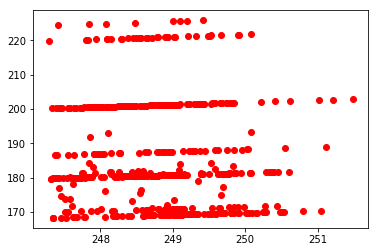

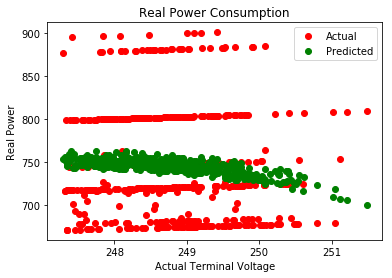

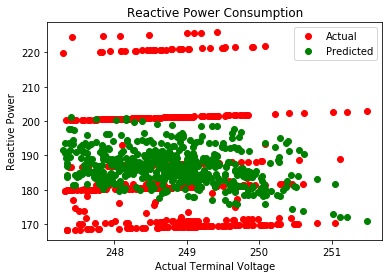

1 to 3


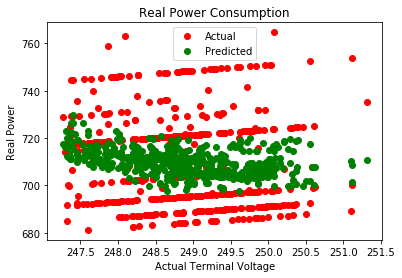

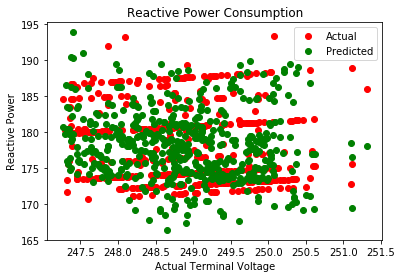

2 to 4


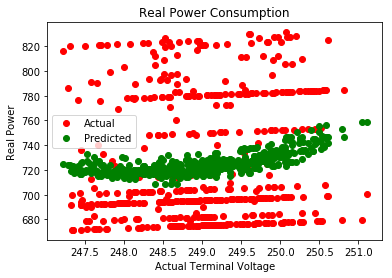

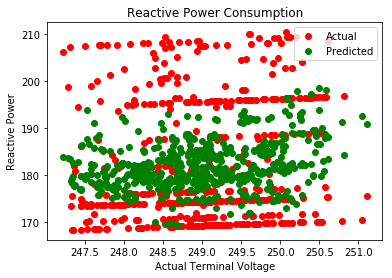

3 to 5


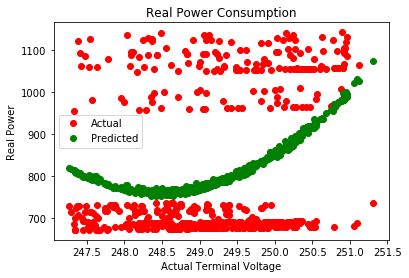

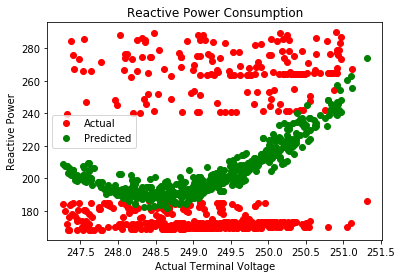

4 to 6


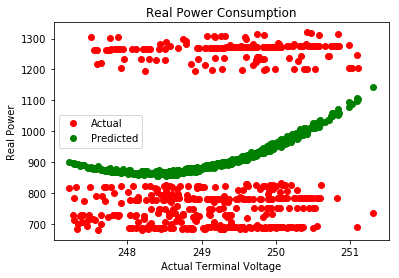

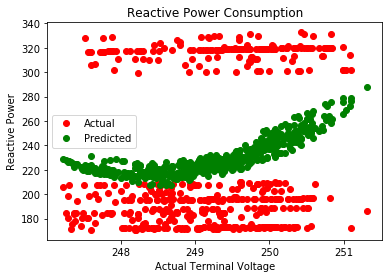

5 to 7


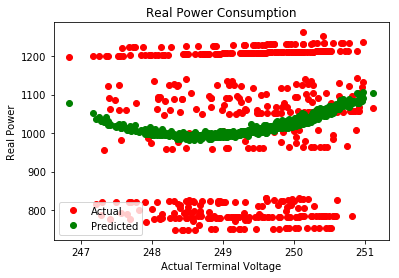

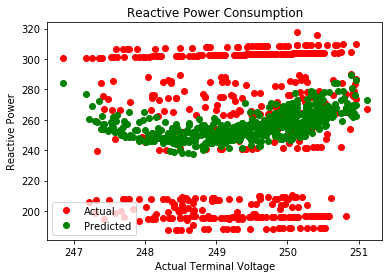

6 to 8


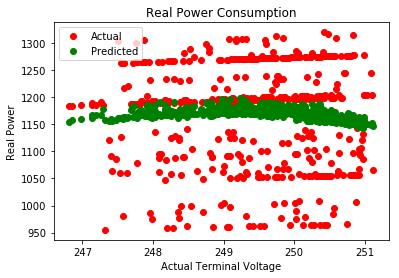

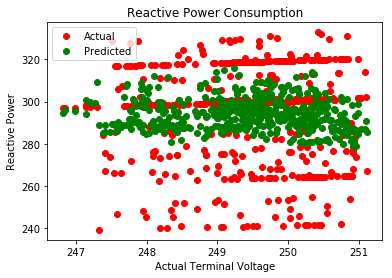

7 to 9


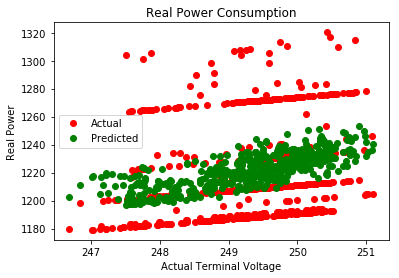

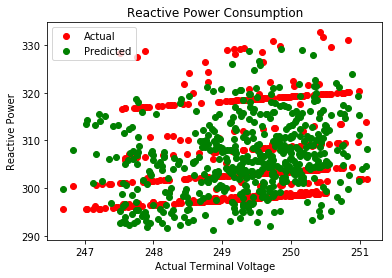

8 to 10


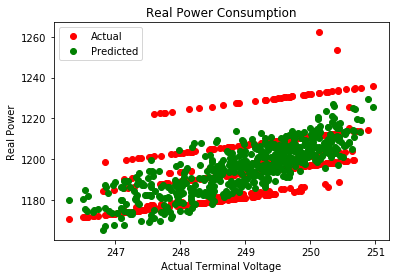

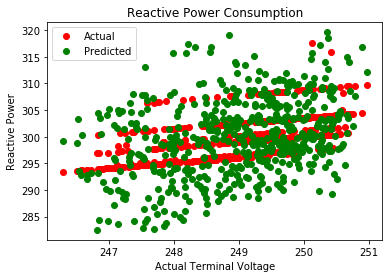

9 to 11


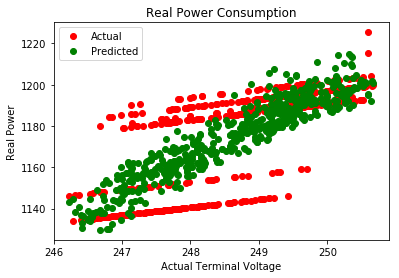

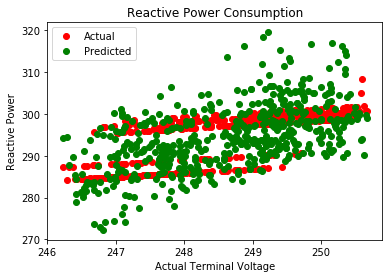

10 to 12


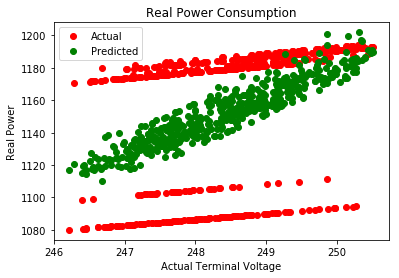

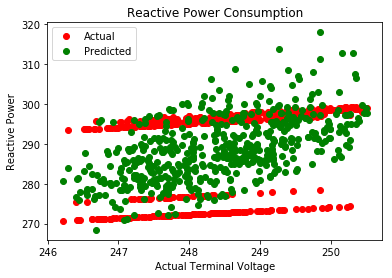

11 to 13


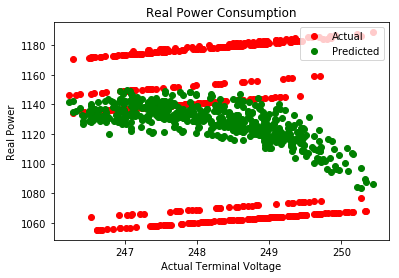

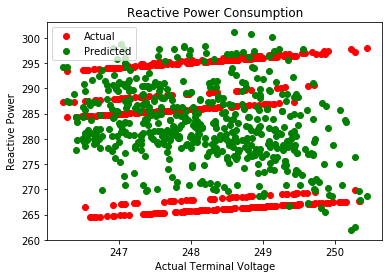

12 to 14


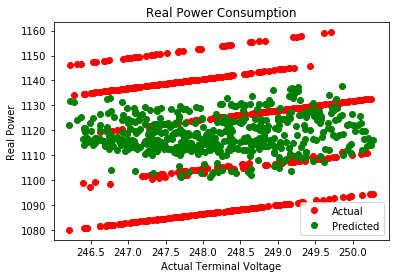

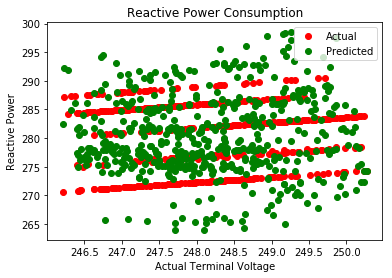

13 to 15


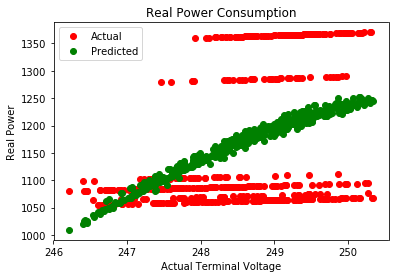

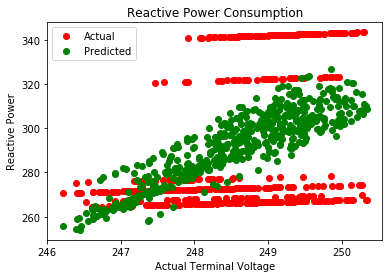

14 to 16


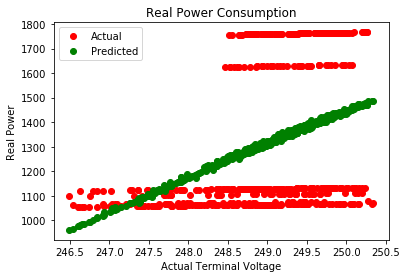

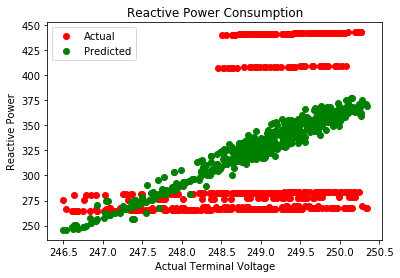

15 to 17


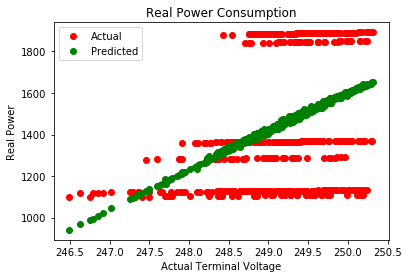

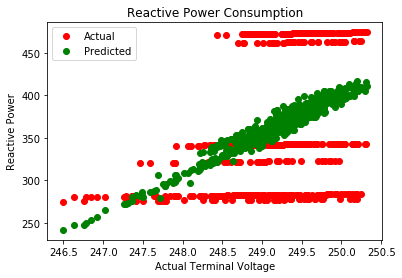

16 to 18


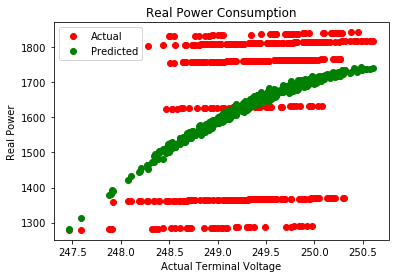

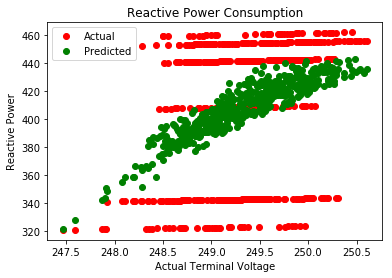

17 to 19


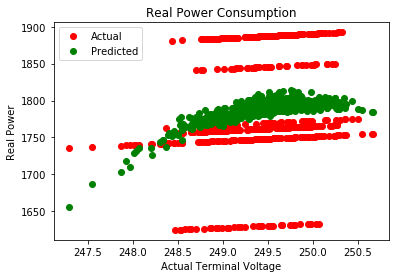

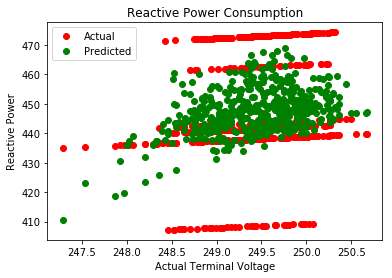

18 to 20


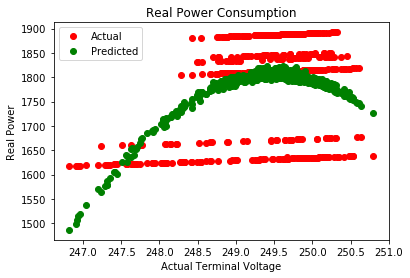

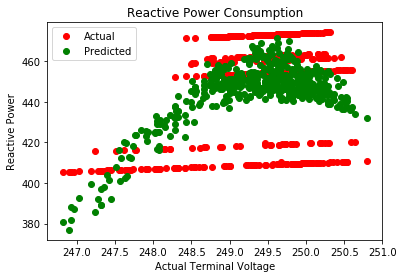

19 to 21


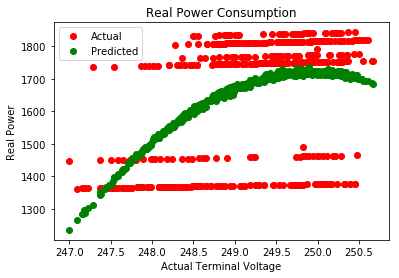

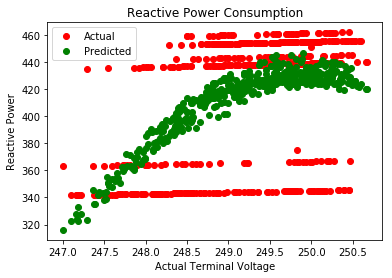

20 to 22


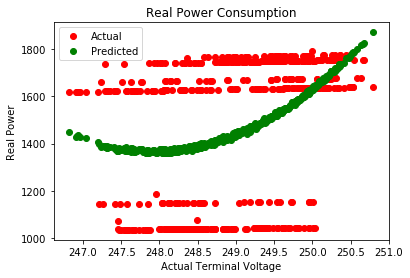

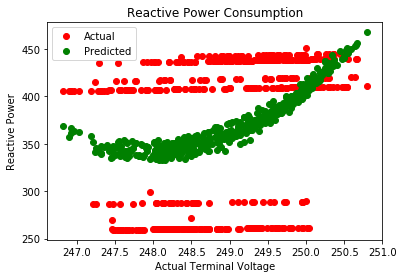

21 to 23


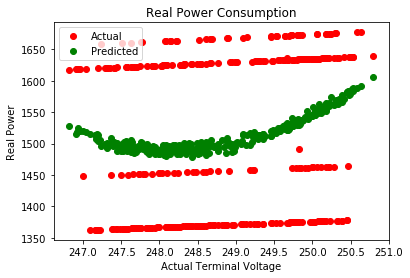

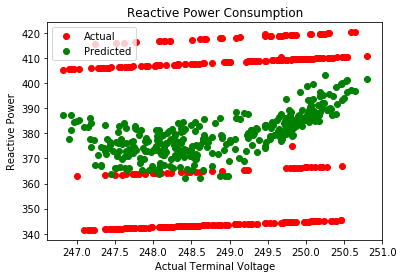

22 to 24


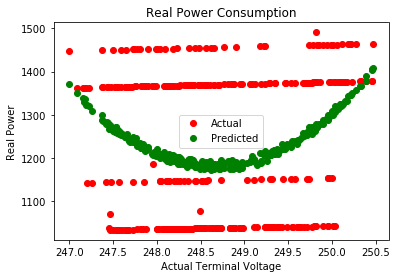

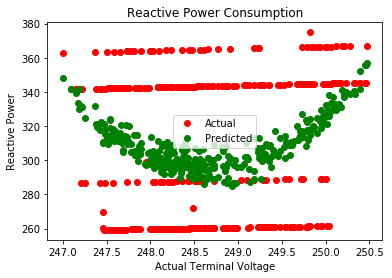

Weekends
0 to 2


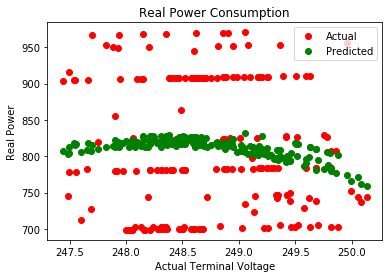

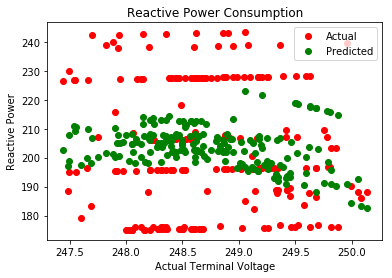

1 to 3


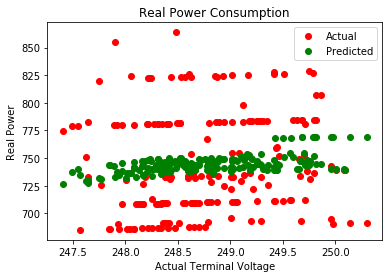

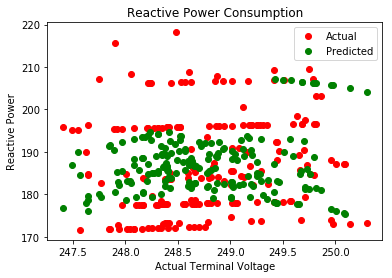

2 to 4


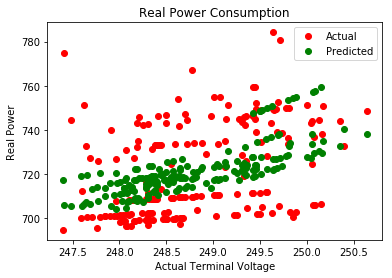

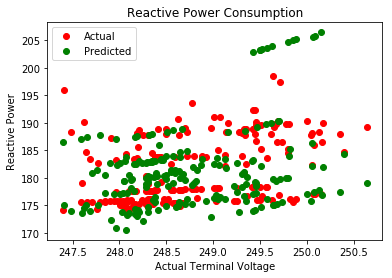

3 to 5


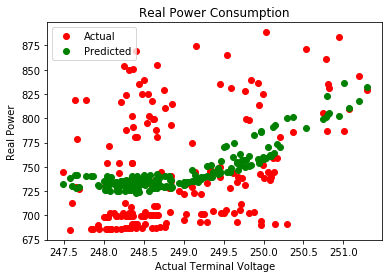

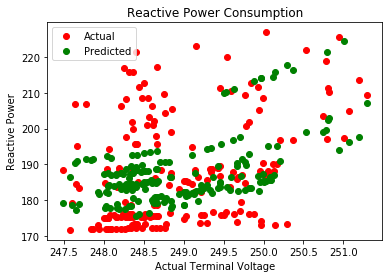

4 to 6


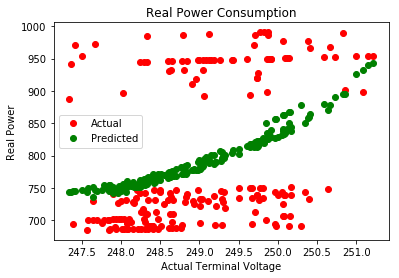

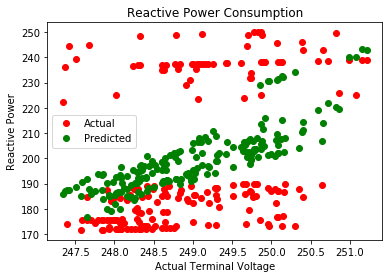

5 to 7


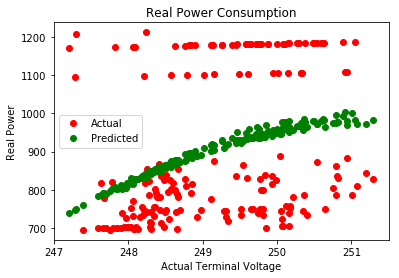

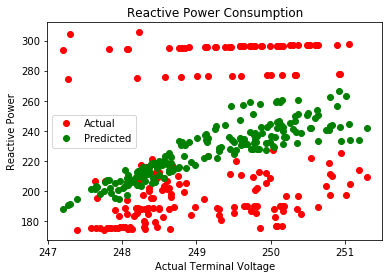

6 to 8


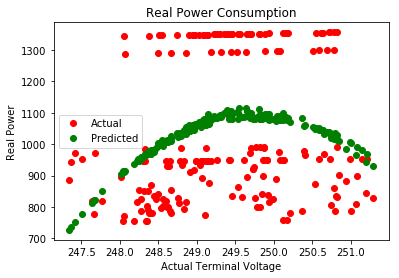

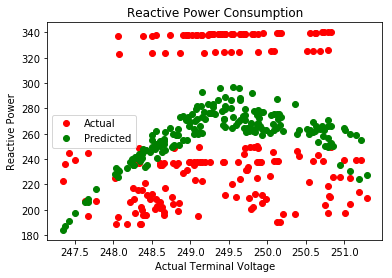

7 to 9


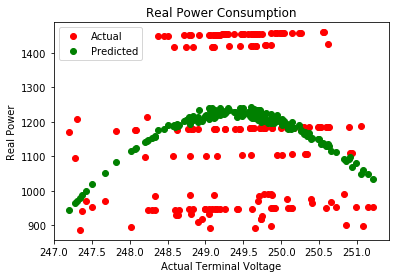

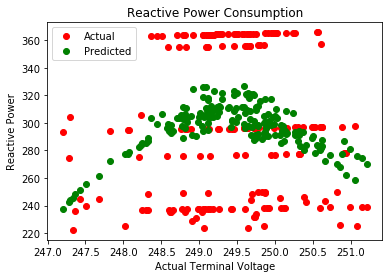

8 to 10


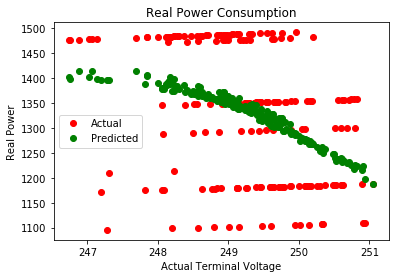

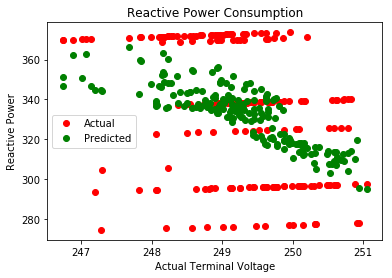

9 to 11


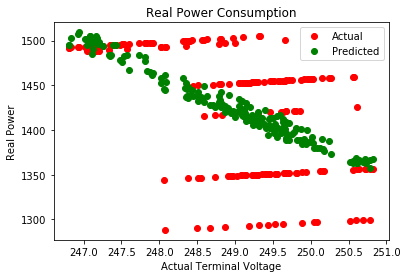

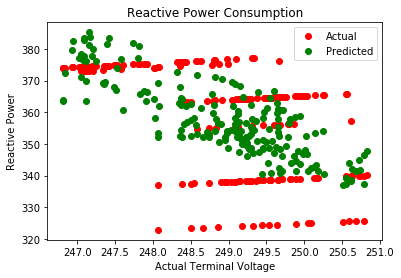

10 to 12


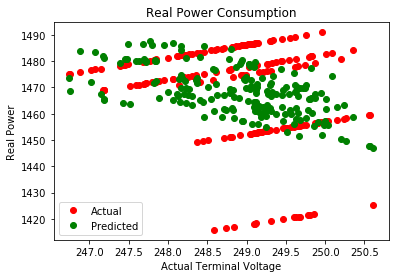

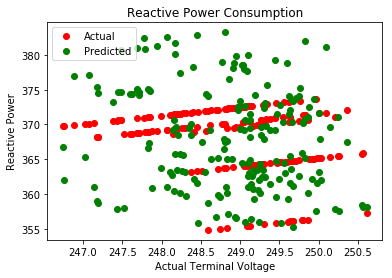

11 to 13


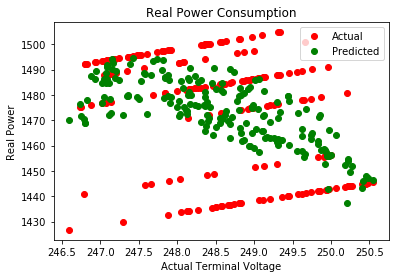

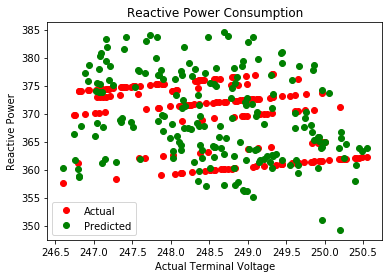

12 to 14


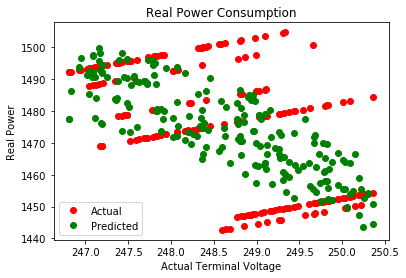

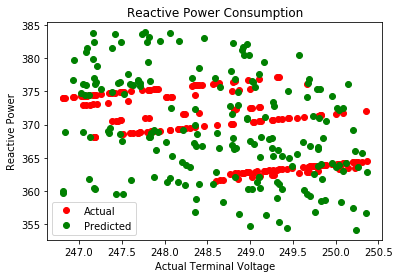

13 to 15


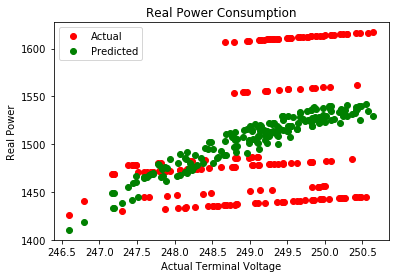

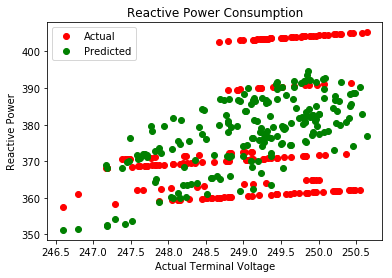

14 to 16


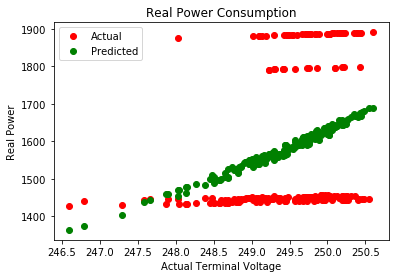

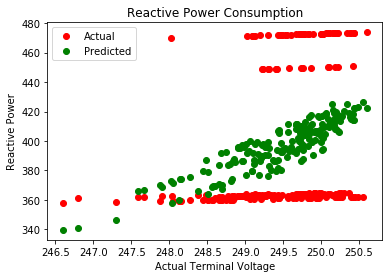

15 to 17


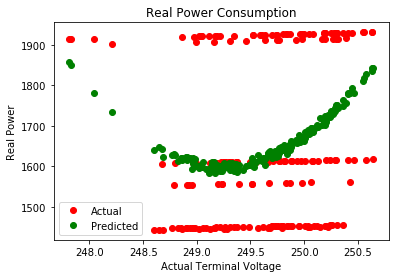

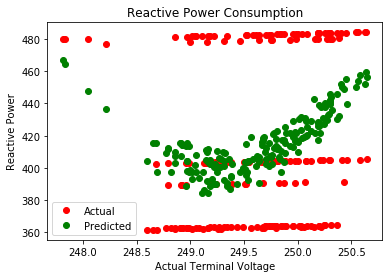

16 to 18


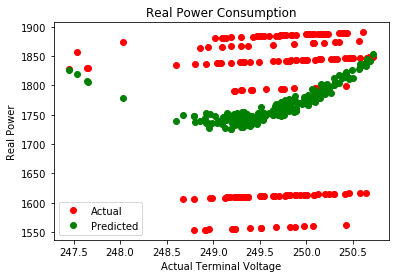

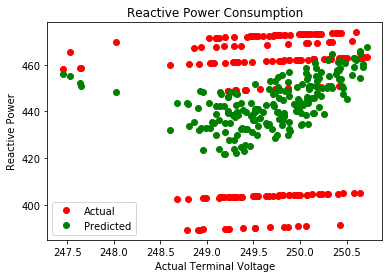

17 to 19


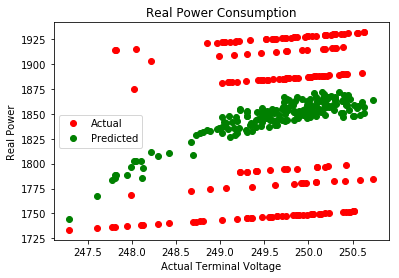

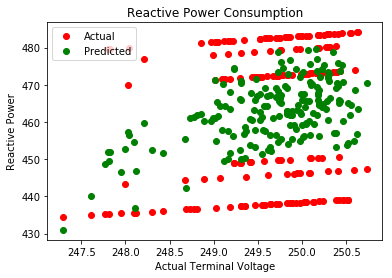

18 to 20


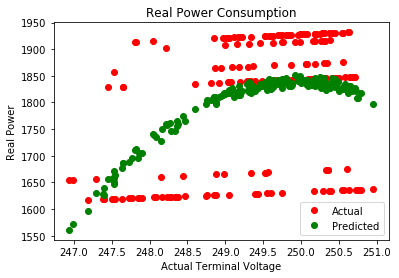

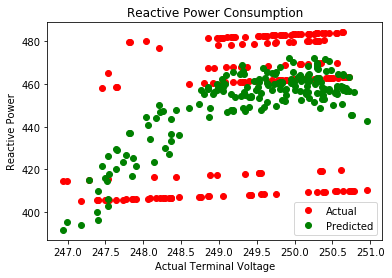

19 to 21


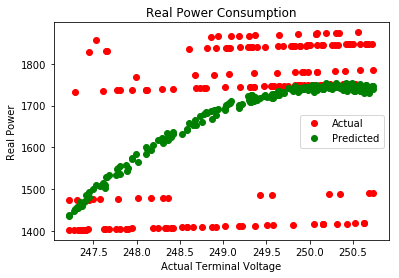

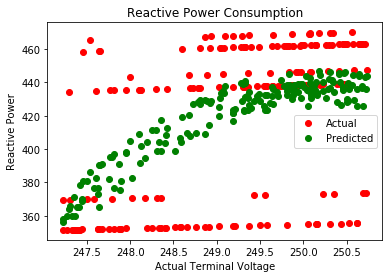

20 to 22


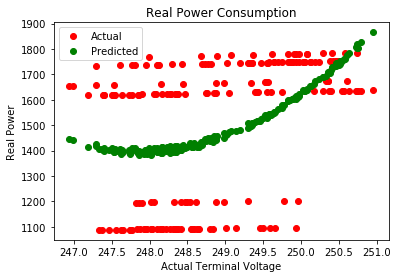

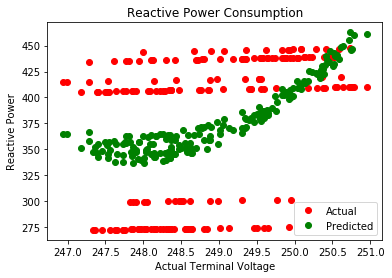

21 to 23


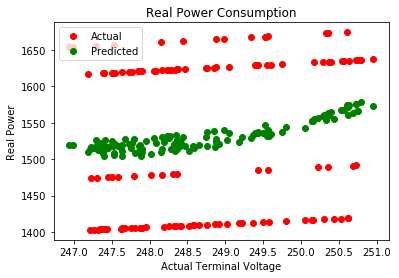

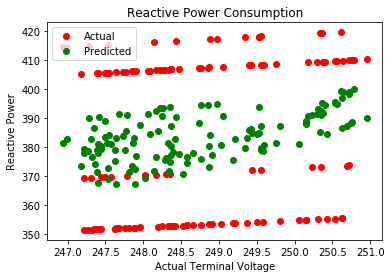

22 to 24


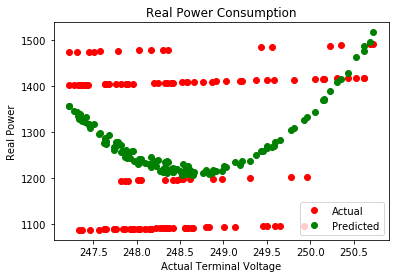

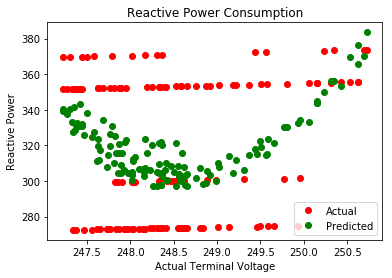

Season  2
2013-03-01
2013-05-15
Weekdays
0 to 2


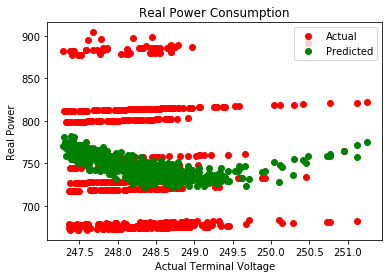

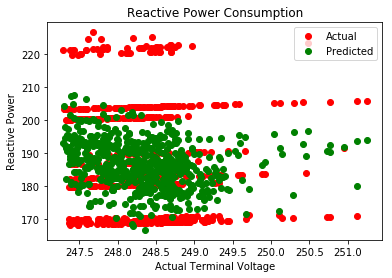

1 to 3


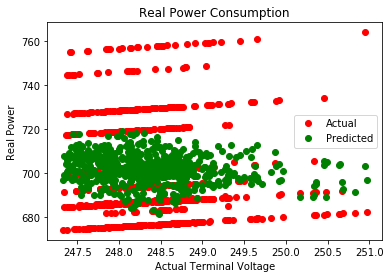

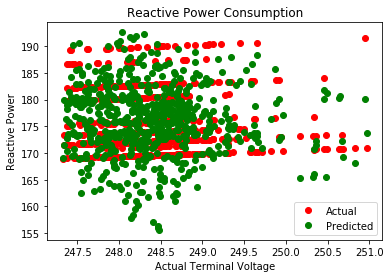

2 to 4


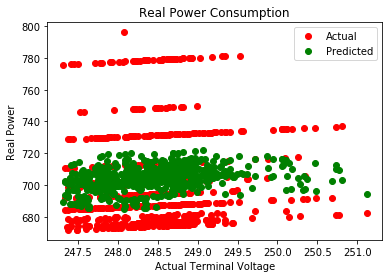

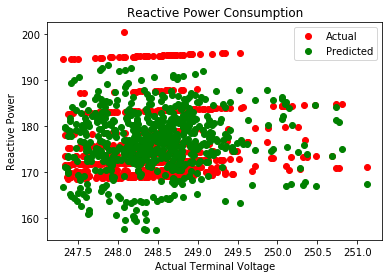

3 to 5


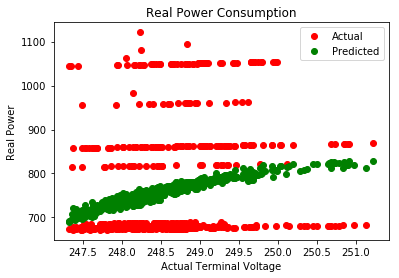

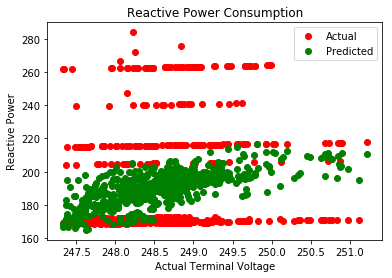

4 to 6


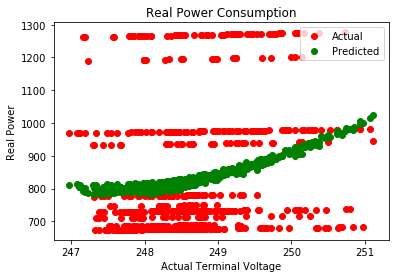

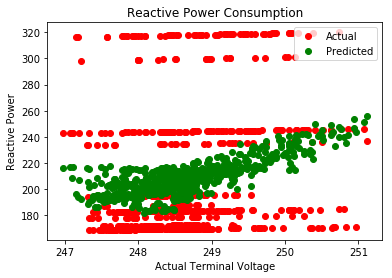

5 to 7


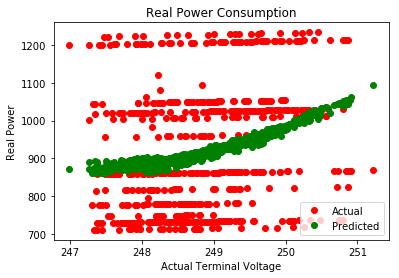

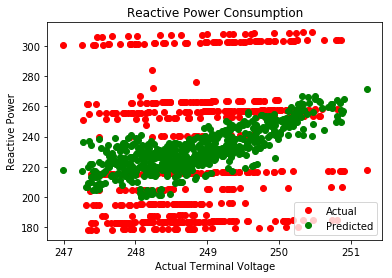

6 to 8


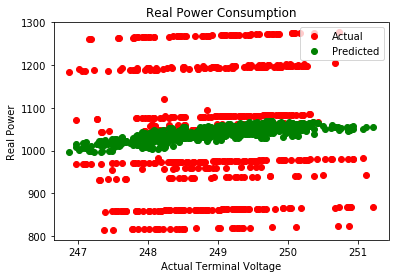

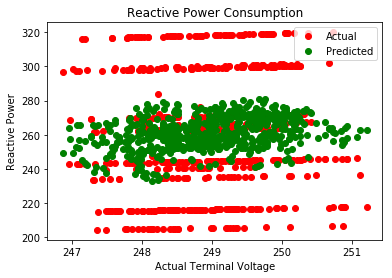

7 to 9


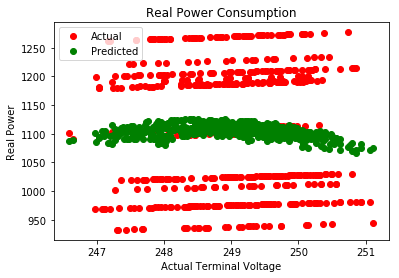

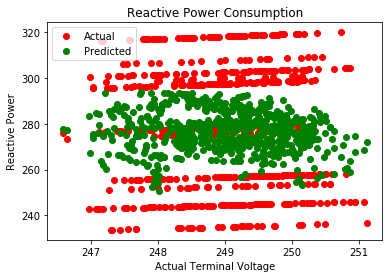

8 to 10


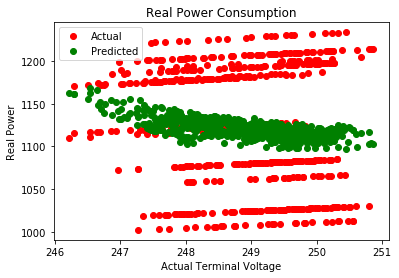

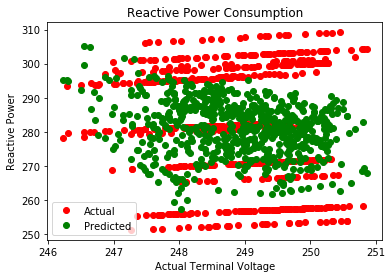

9 to 11


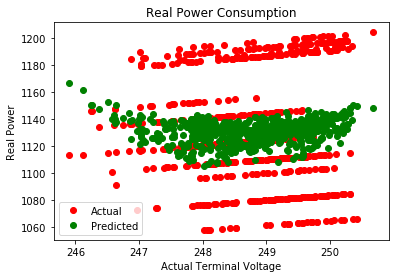

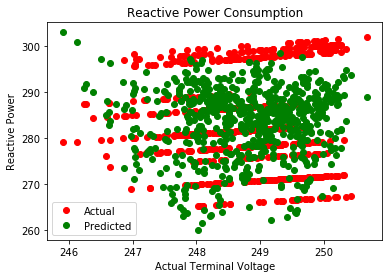

10 to 12


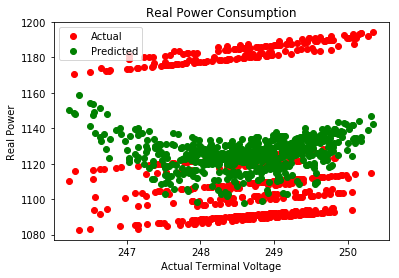

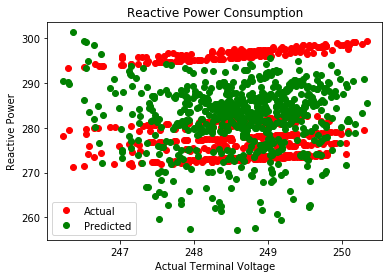

11 to 13


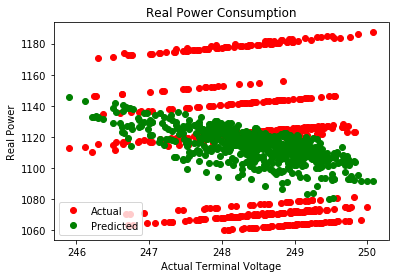

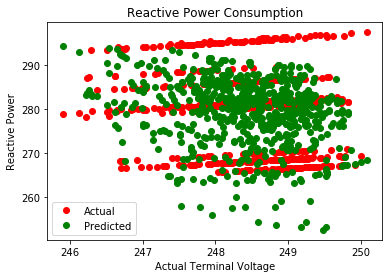

12 to 14


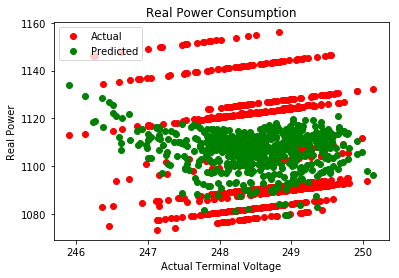

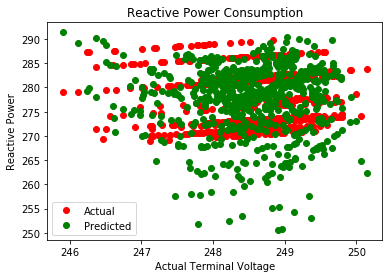

13 to 15


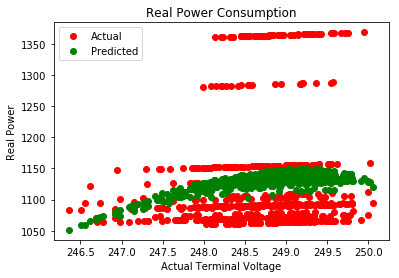

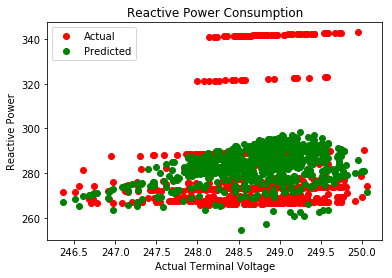

14 to 16


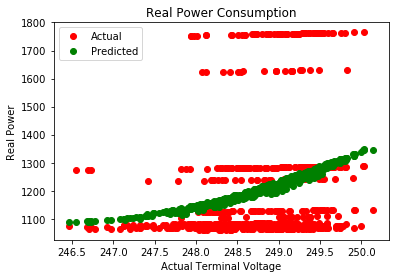

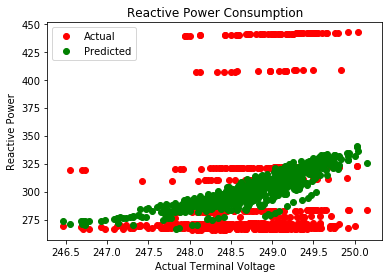

15 to 17


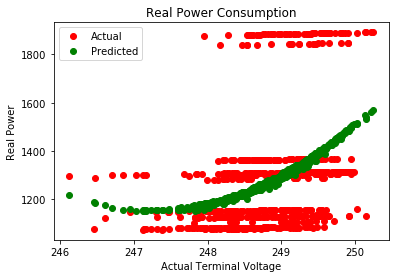

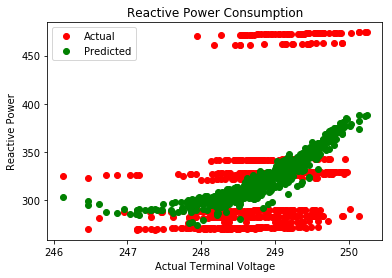

16 to 18


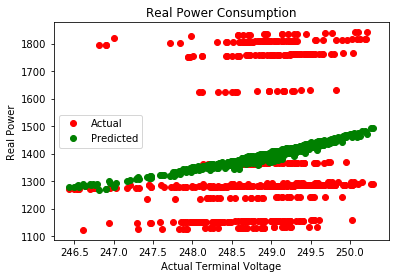

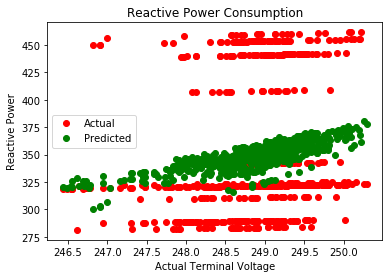

17 to 19


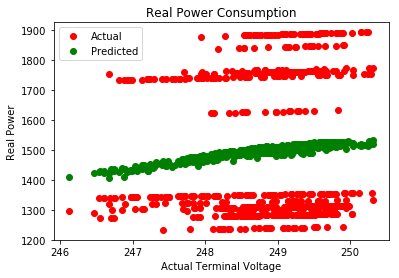

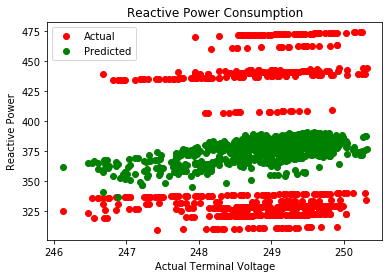

18 to 20


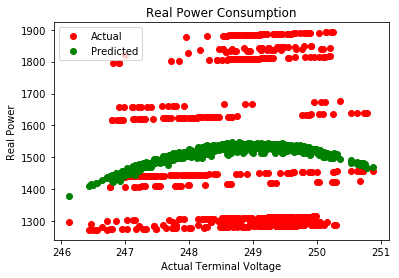

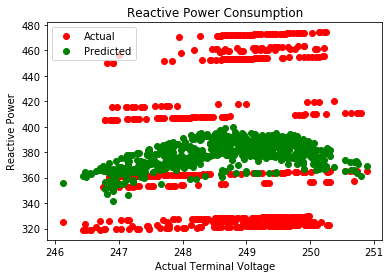

19 to 21


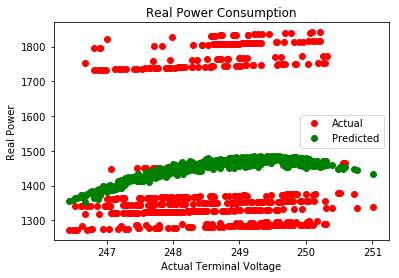

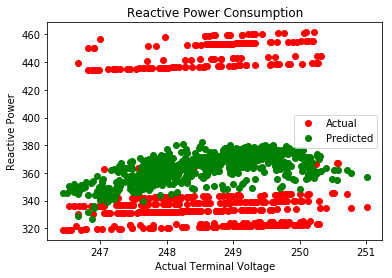

20 to 22


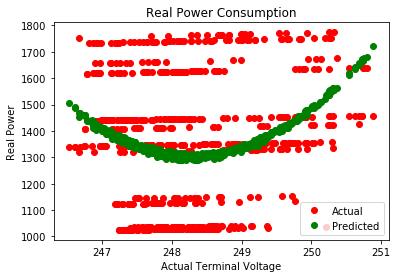

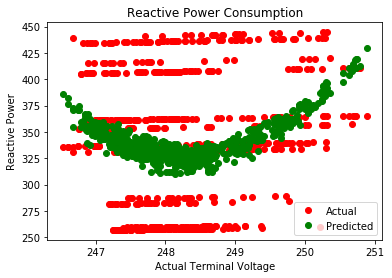

21 to 23


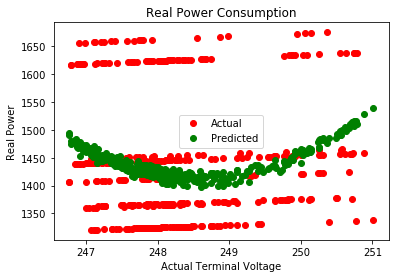

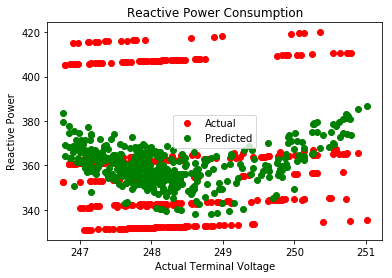

22 to 24


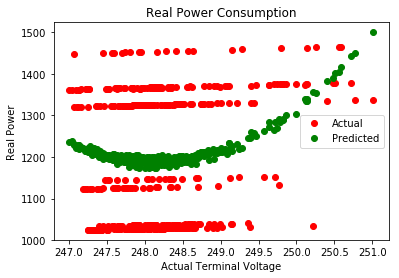

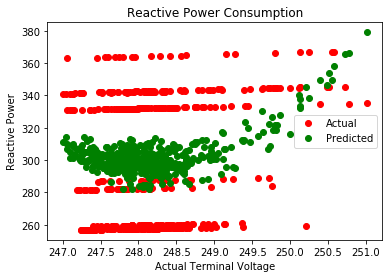

Weekends
0 to 2


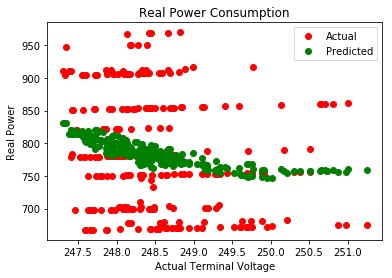

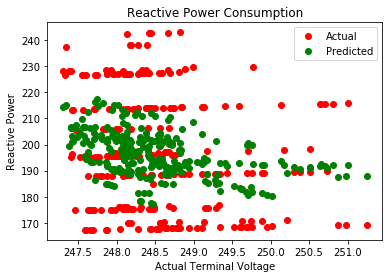

1 to 3


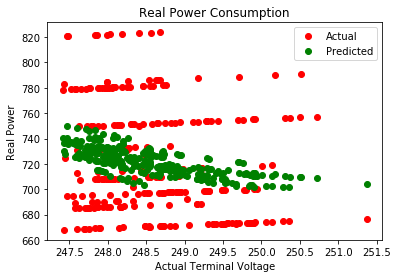

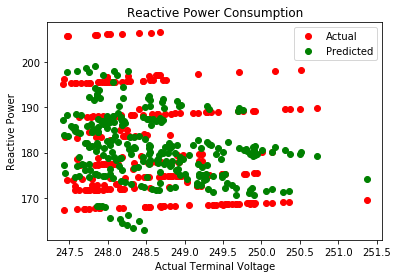

2 to 4


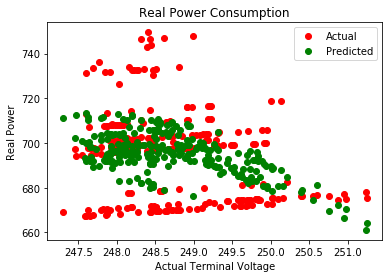

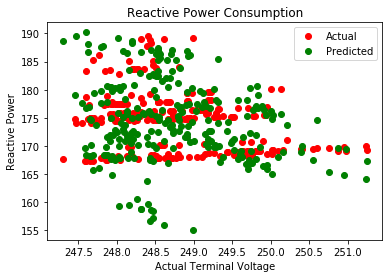

3 to 5


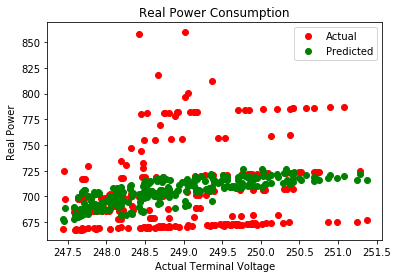

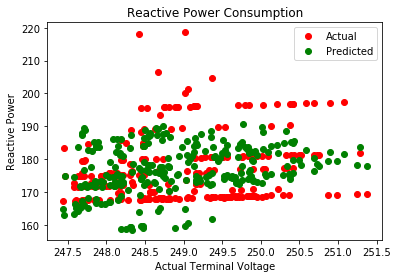

4 to 6


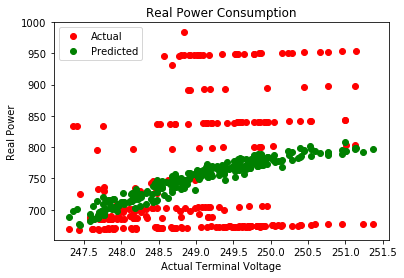

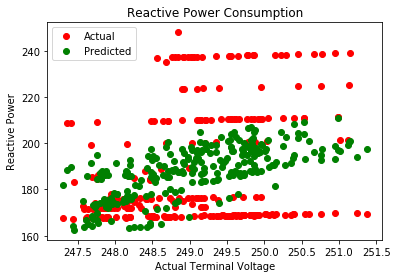

5 to 7


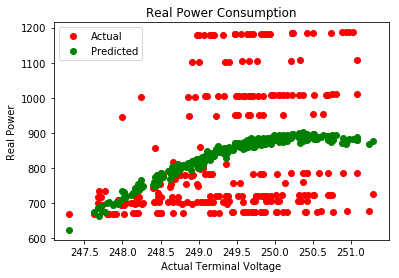

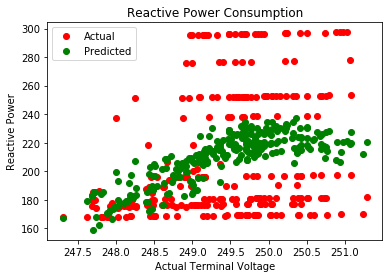

6 to 8


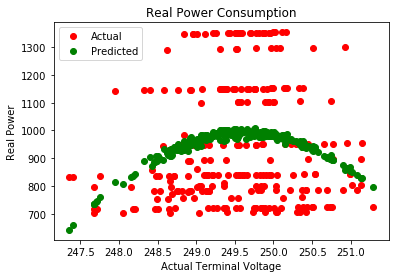

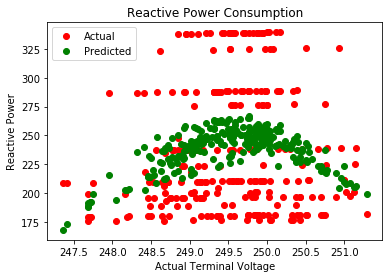

7 to 9


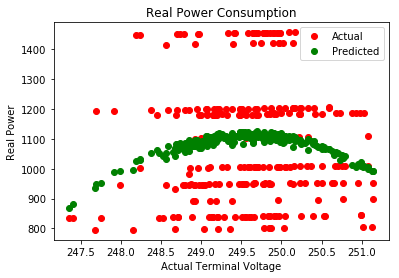

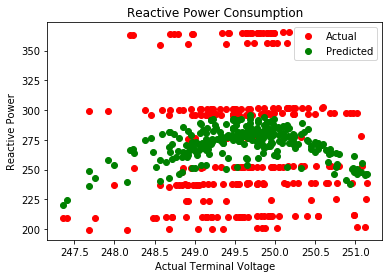

8 to 10


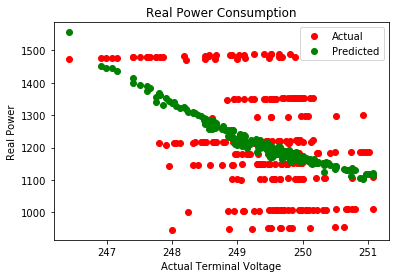

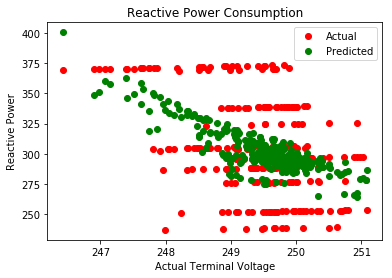

9 to 11


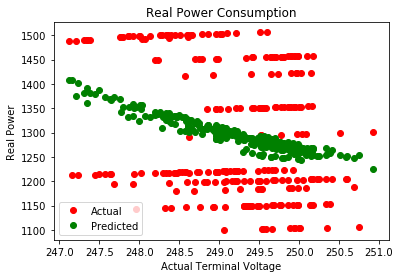

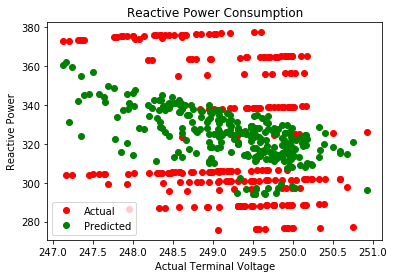

10 to 12


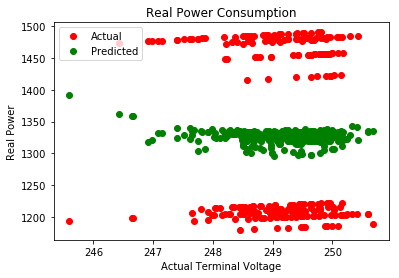

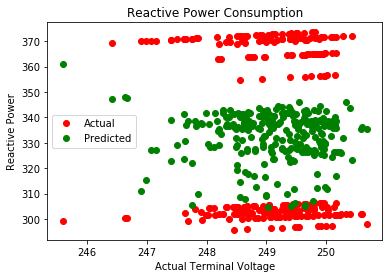

11 to 13


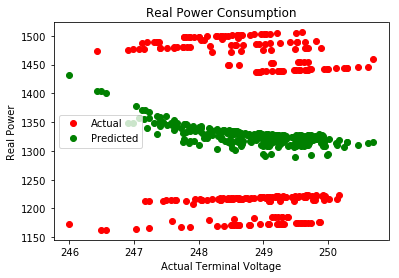

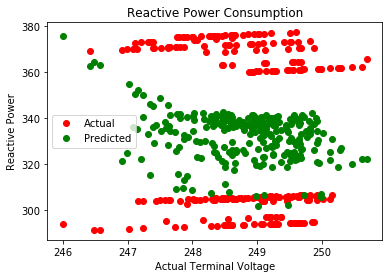

12 to 14


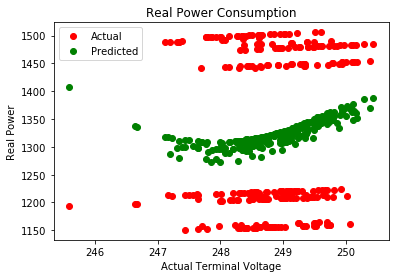

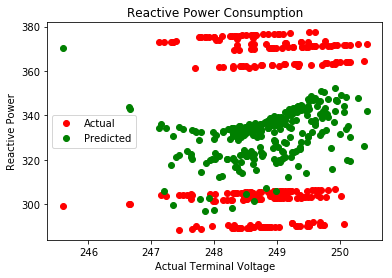

13 to 15


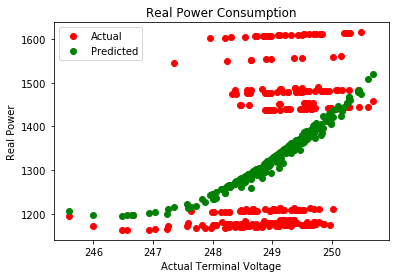

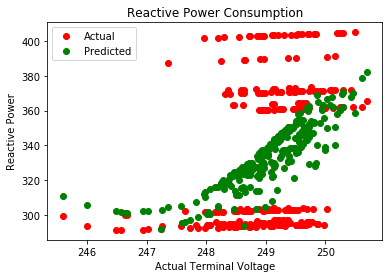

14 to 16


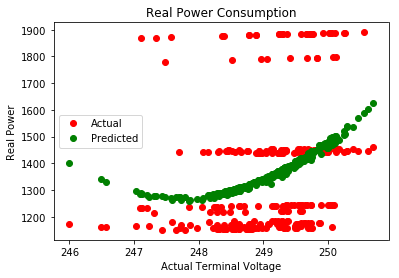

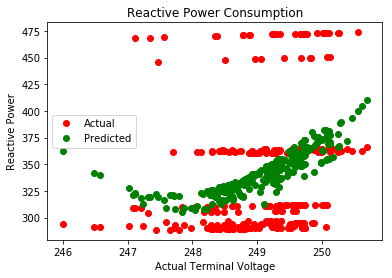

15 to 17


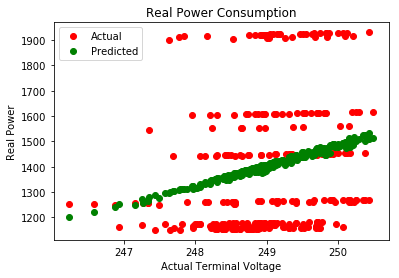

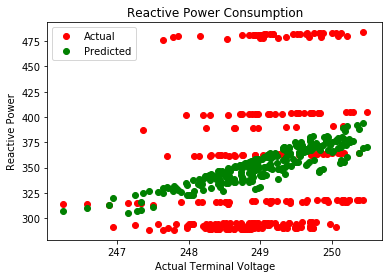

16 to 18


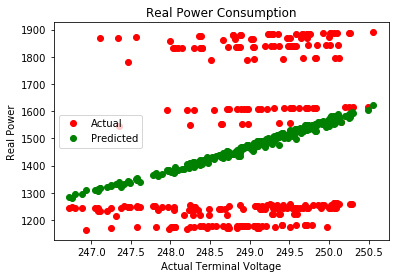

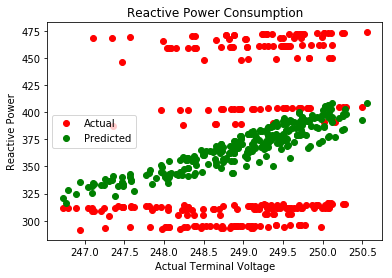

17 to 19


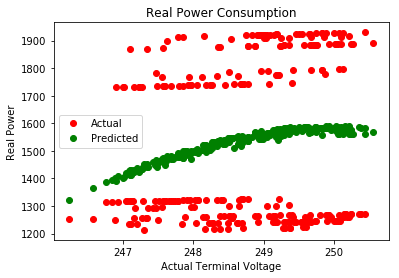

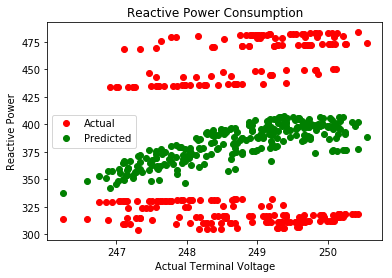

18 to 20


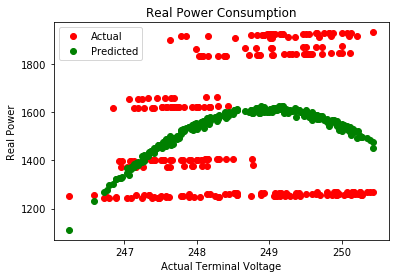

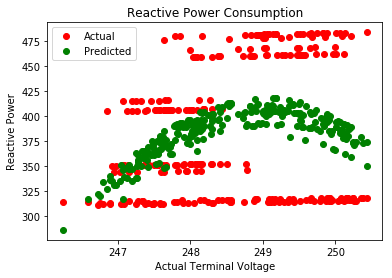

19 to 21


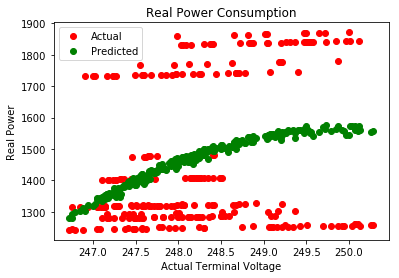

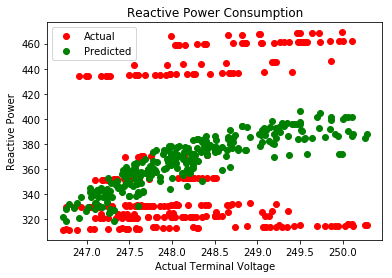

20 to 22


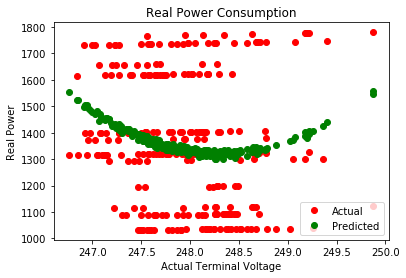

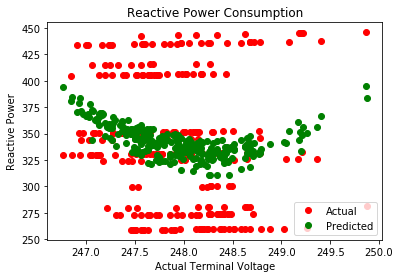

21 to 23


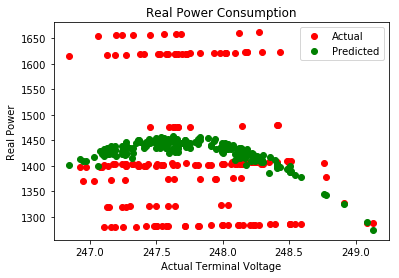

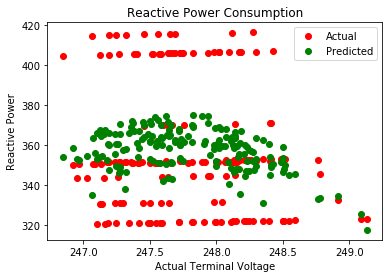

22 to 24


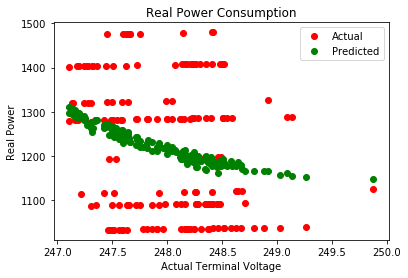

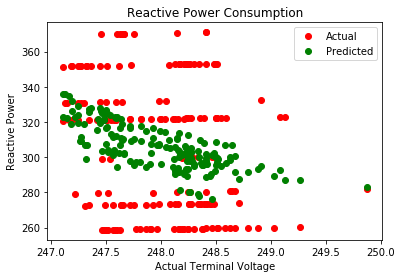

In [412]:
realCoefficients=[]
reactiveCoefficients=[]
hourwindow=2

for j in range(0,len(seasonDates)-1):
    realPowerSeason=realP[seasonDates[j]:seasonDates[j+1]]
    realVoltageSeason=realV[seasonDates[j]:seasonDates[j+1]]
    reactivePowerSeason=reactiveP[seasonDates[j]:seasonDates[j+1]]
    reactiveVoltageSeason=reactiveV[seasonDates[j]:seasonDates[j+1]]
    temperatureSeason=amiTemp[seasonDates[j]:seasonDates[j+1]]
    
    date_list=getDateList(seasonDates[j],seasonDates[j+1])
    print("Season ",j+1)
    print(seasonDates[j])
    print(seasonDates[j+1])
    #print(date_list)  
    
    for i in (0,1):
        if i==0: #weekdays
            days=[(day.strftime('%Y-%m-%d')) for day in date_list if (day.isoweekday()==1 or day.isoweekday()==2 or day.isoweekday()==3 or day.isoweekday()==4 or day.isoweekday()==5)]
            print("Weekdays")
        else: #weekends
            days=[(day.strftime('%Y-%m-%d')) for day in date_list if (day.isoweekday()==6 or day.isoweekday()==7)]
            print("Weekends")
        
            
        totalrealPower=getDays(realPowerSeason,days)
        totalrealVoltage=getDays(realVoltageSeason,days)
        totalreactivePower=getDays(reactivePowerSeason,days)
        totalreactiveVoltage=getDays(reactiveVoltageSeason,days)
        totaltemperature=getDays(temperatureSeason,days)
        
        for hr in range(0,23):
            realPower=getHourData(totalrealPower,hourwindow,hr)
            realVoltage=getHourData(totalrealVoltage,hourwindow,hr)
            reactivePower=getHourData(totalreactivePower,hourwindow,hr)
            reactiveVoltage=getHourData(totalreactiveVoltage,hourwindow,hr)
            temperature=getHourData(totaltemperature,hourwindow,hr)
            
            print(hr,"to",hr+hourwindow)
            hr=hr+hourwindow
            apparentVoltage=((realVoltage**2)+(reactiveVoltage**2))**0.5
            apparentPower=((realPower**2)+(reactivePower**2))**0.5
            independentVariable=apparentVoltage/apparentVoltage.mean() # or .median()
    
            columnNames=independentVariable.columns
            
            t=temperature.values
            t=np.reshape(t,len(t))
            x=independentVariable[columnNames[1]]
            x=x.values
            
            xaxis=apparentVoltage[columnNames[1]]
            y1=realPower[columnNames[1]]
            y1=y1.values
            
            y2=reactivePower[columnNames[1]]
            
            coefficient1, covar = curve_fit(myfunc, (x,t), y1,maxfev=8000)#,method='lm',p0=init_vals)
            coefficient2, covar = curve_fit(myfunc, (x,t), y2,maxfev=8000)#,method='lm',p0=init_vals)

            xx= np.linspace(x.min(),x.max(),100)
            xxaxis=np.linspace(xaxis.min(),xaxis.max(),100)


            #polynomial1=np.poly1d(coefficient1)

            fid,cx = pyplot.subplots()
            cx.plot(xaxis,y1,'ro',label='Actual')
            cx.plot(xaxis,myfunc((x,t),coefficient1[0],coefficient1[1],coefficient1[2]),'go',label='Predicted')
            
            cx.legend()
            cx.set_title('Real Power Consumption')
            cx.set_xlabel('Actual Terminal Voltage')
            cx.set_ylabel('Real Power')
            pyplot.show()


            #polynomial2=np.poly1d(coefficient2)
            xx= np.linspace(x.min(),x.max(),100)
            xxaxis=np.linspace(xaxis.min(),xaxis.max(),100)

            fid,cx = pyplot.subplots()
            cx.plot(xaxis,y2,'ro',label='Actual')
            cx.plot(xaxis,myfunc((x,t),coefficient2[0],coefficient2[1],coefficient2[2]),'go',label='Predicted')
            
            cx.legend()
            cx.set_title('Reactive Power Consumption')
            cx.set_xlabel('Actual Terminal Voltage')
            cx.set_ylabel('Reactive Power')
            pyplot.show()
            
            realCoefficients.append(coeff1)
            reactiveCoefficients.append(coeff2)
    

In [410]:
coefficient1

array([-177980.13378842,  354156.89375908, -175439.23012535])

CALCULATES THE REAL AND REACTIVE COEEFICIENTS OF based on SEASONS, WEEKDAYS AND WEEKENDS, HOURS USING POLYFIT

Season  1
2013-01-01
2013-03-01
Weekdays
0 to 1


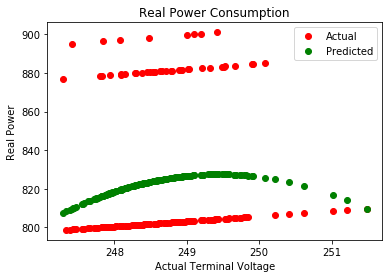

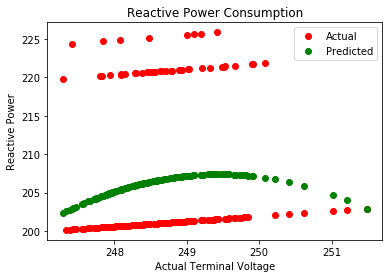

1 to 2


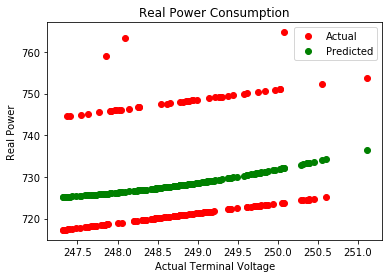

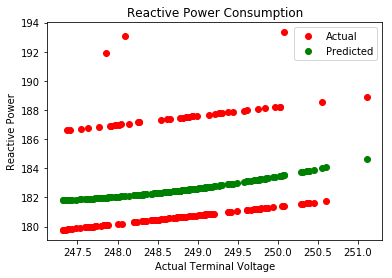

2 to 3


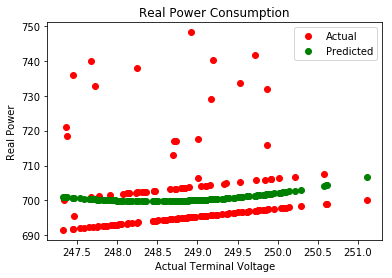

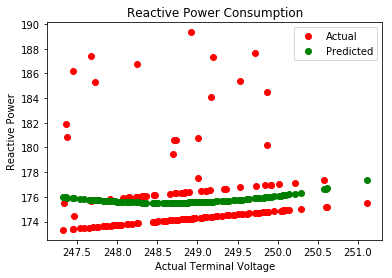

3 to 4


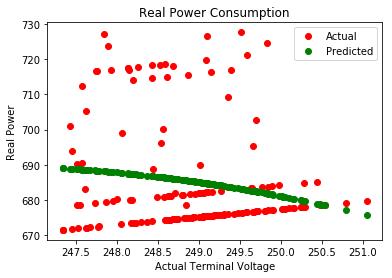

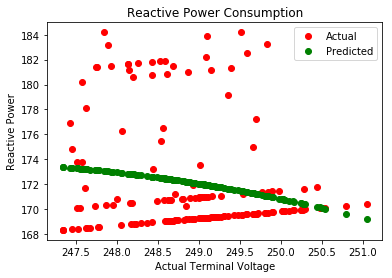

4 to 5


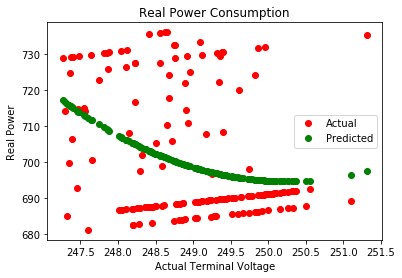

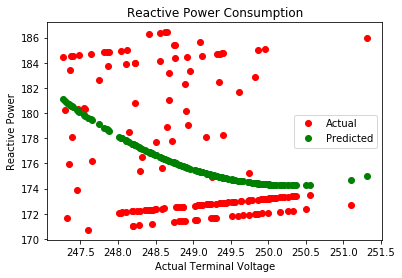

5 to 6


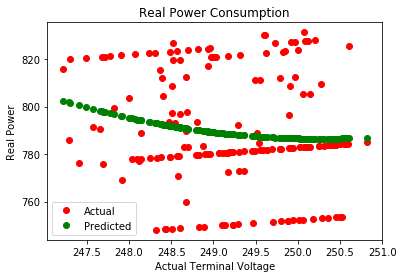

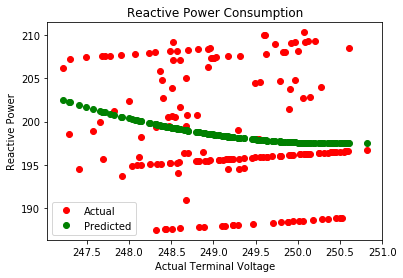

6 to 7


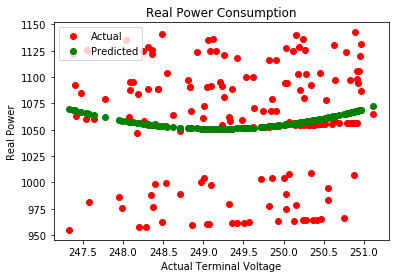

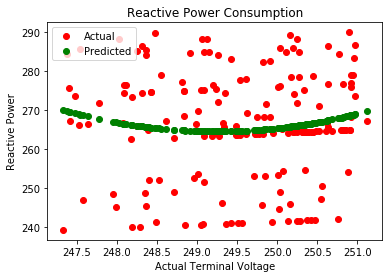

7 to 8


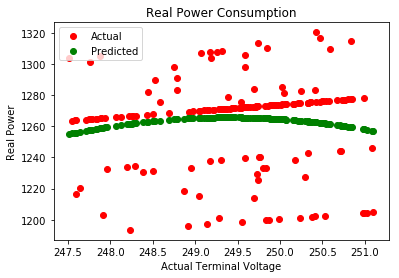

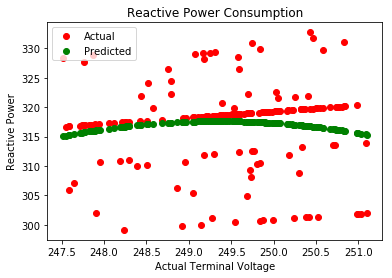

8 to 9


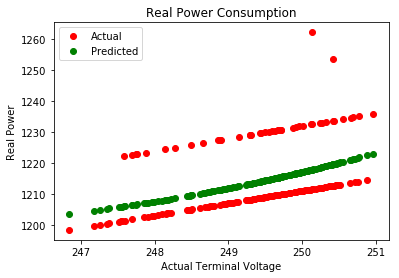

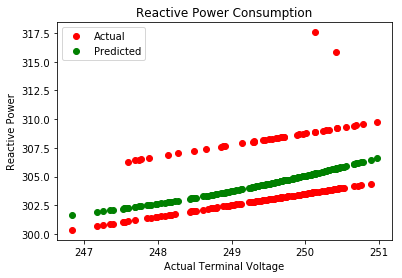

9 to 10


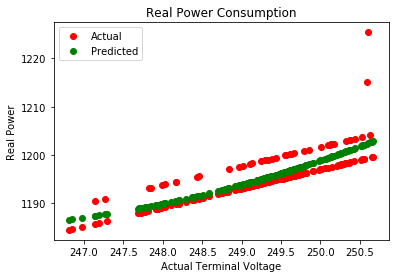

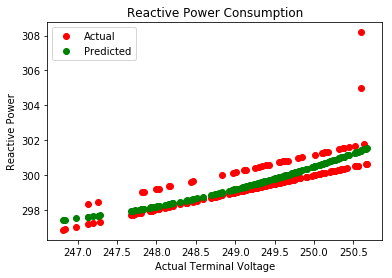

10 to 11


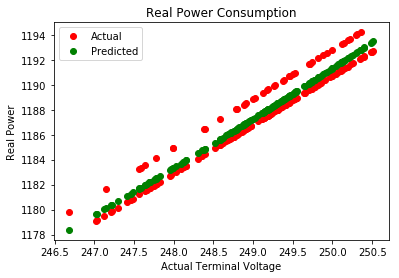

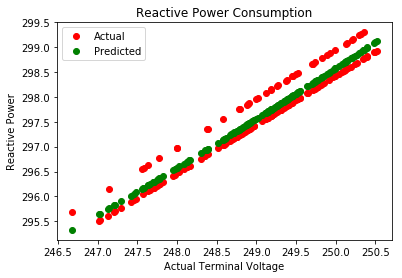

11 to 12


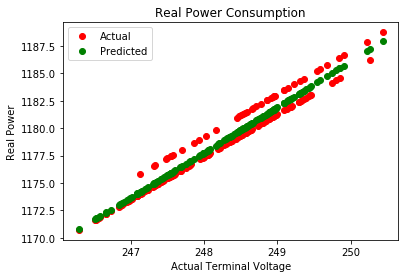

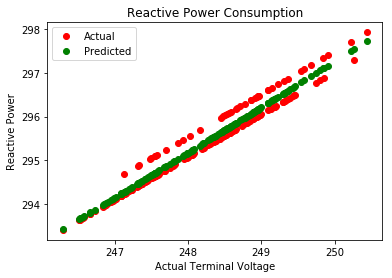

12 to 13


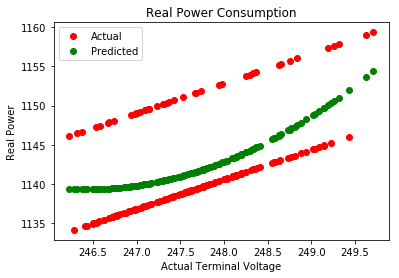

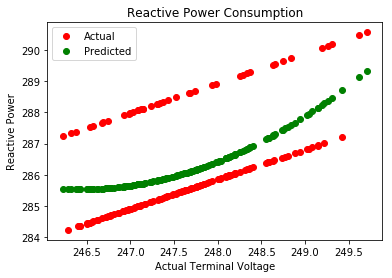

13 to 14


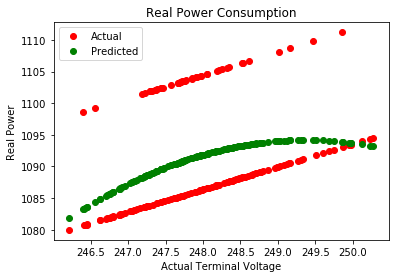

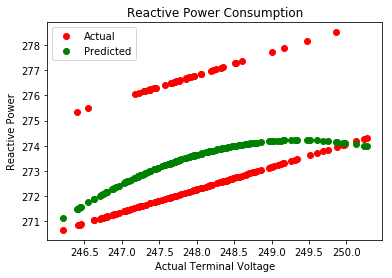

14 to 15


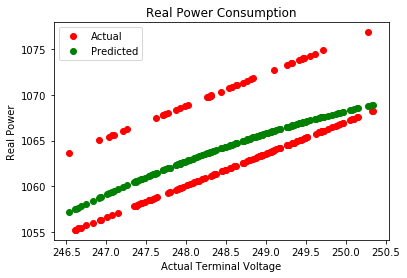

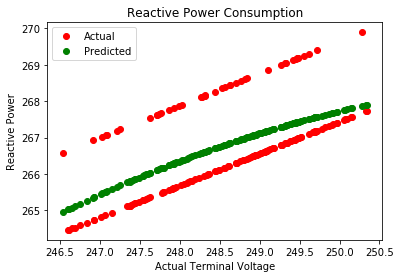

15 to 16


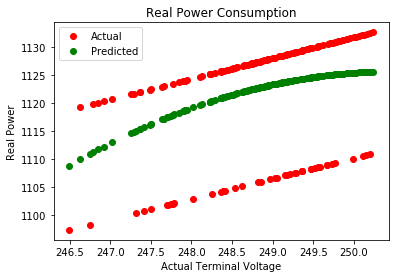

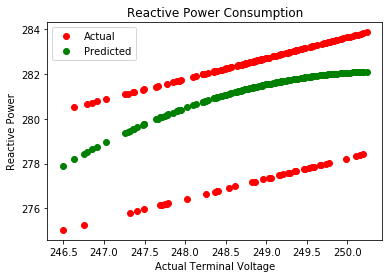

16 to 17


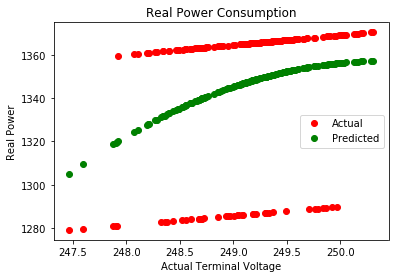

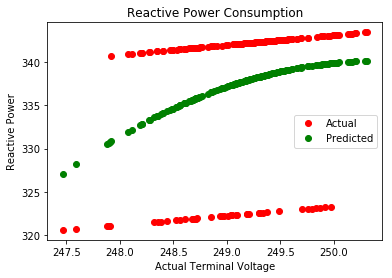

17 to 18


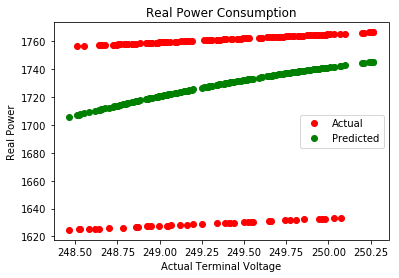

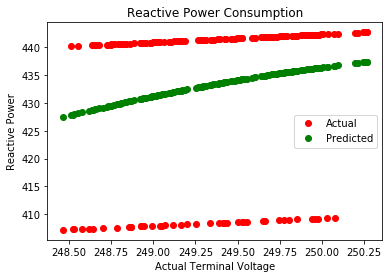

18 to 19


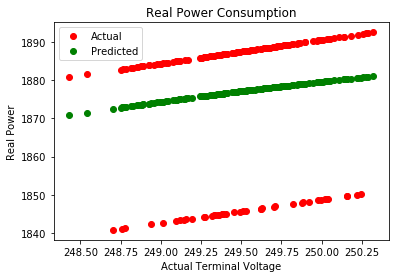

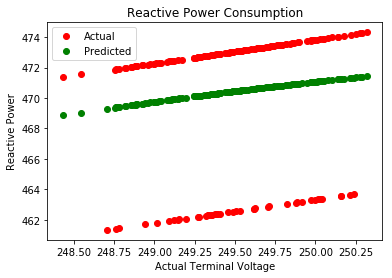

19 to 20


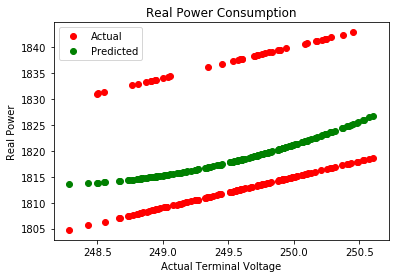

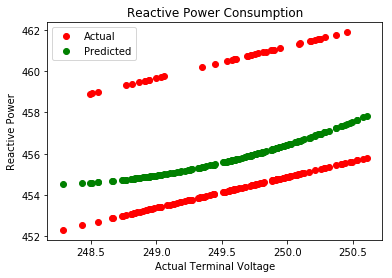

20 to 21


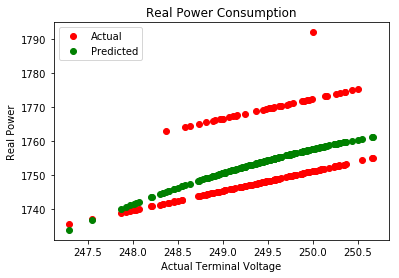

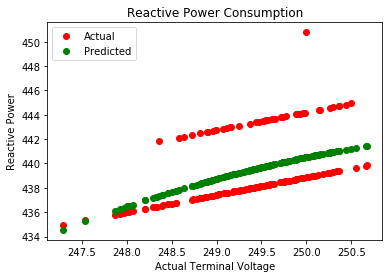

21 to 22


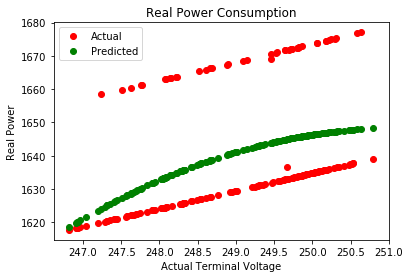

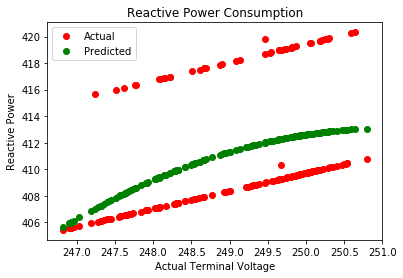

22 to 23


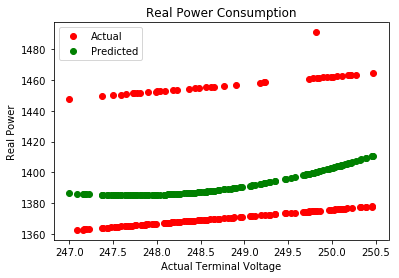

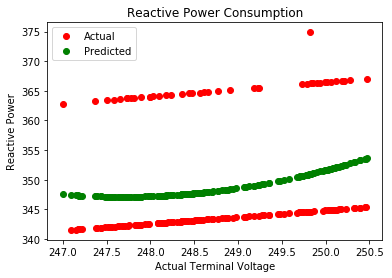

Weekends
0 to 1


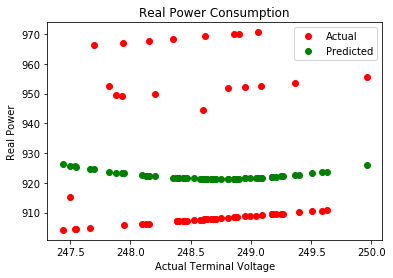

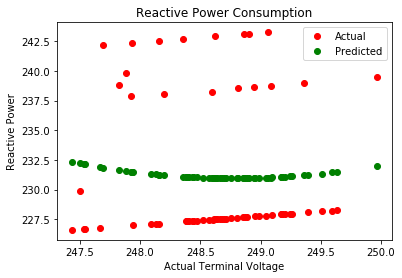

1 to 2


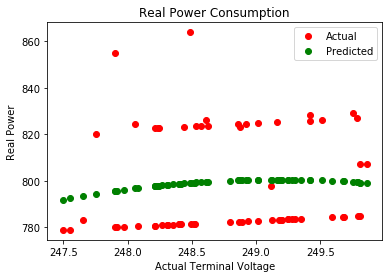

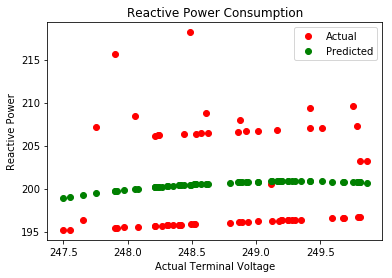

2 to 3


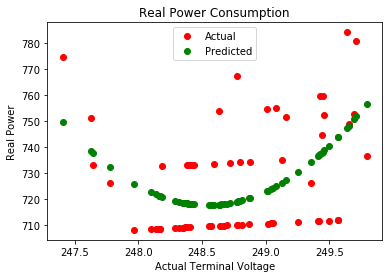

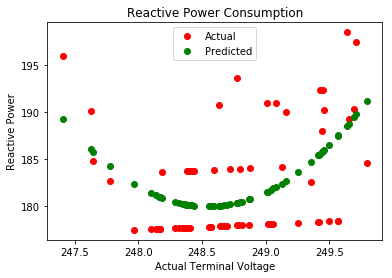

3 to 4


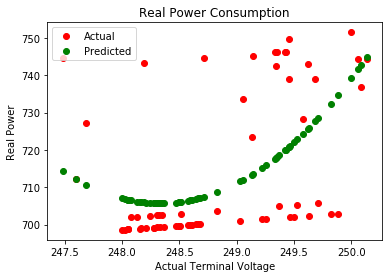

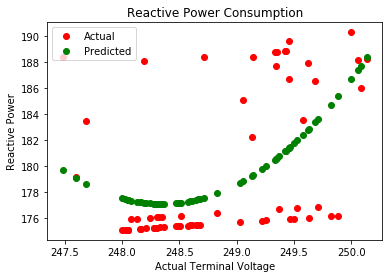

4 to 5


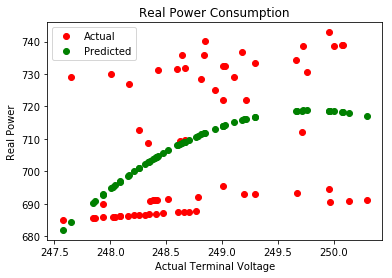

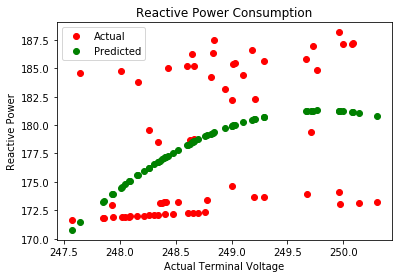

5 to 6


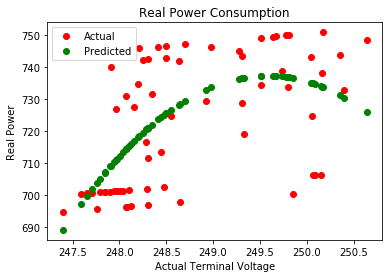

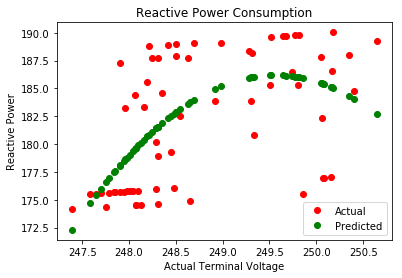

6 to 7


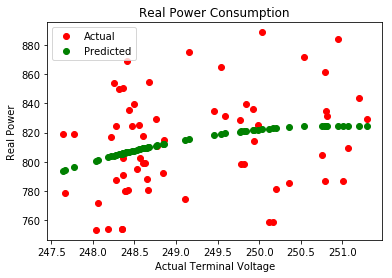

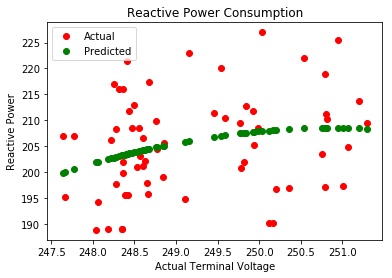

7 to 8


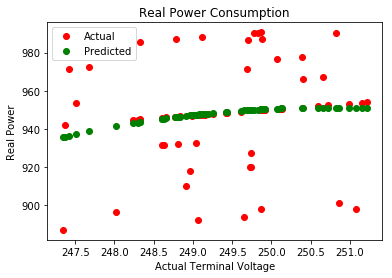

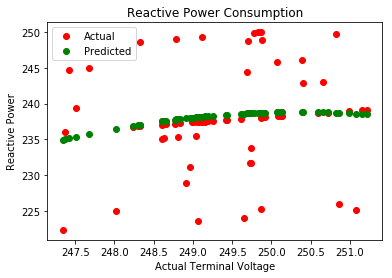

8 to 9


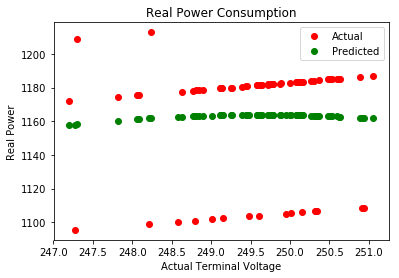

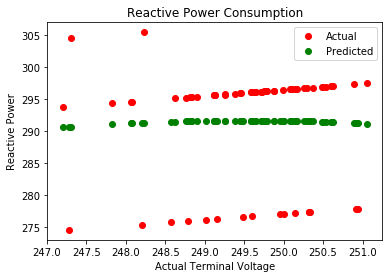

9 to 10


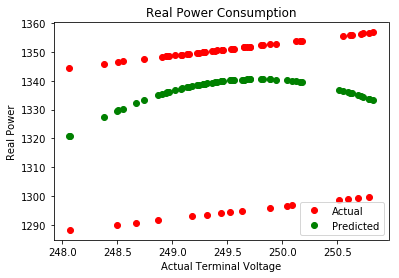

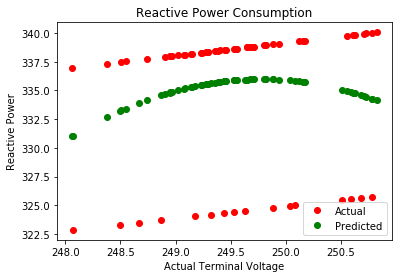

10 to 11


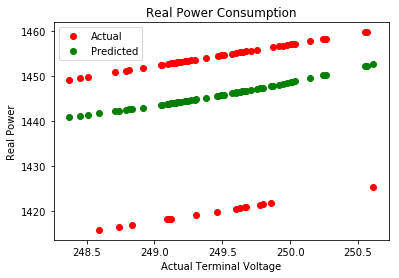

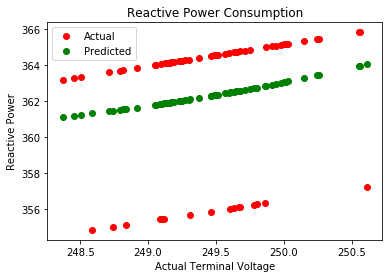

11 to 12


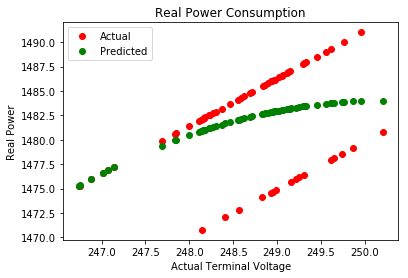

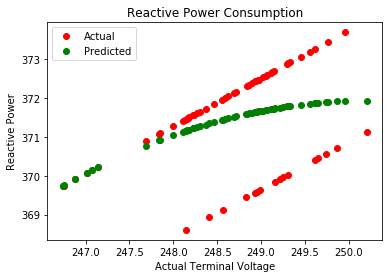

12 to 13


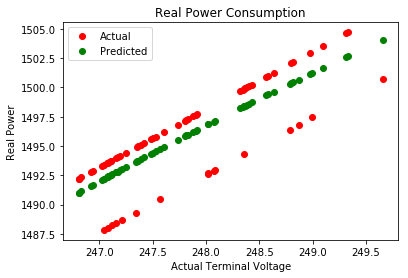

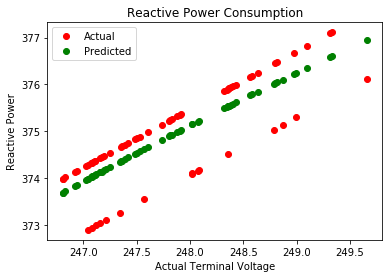

13 to 14


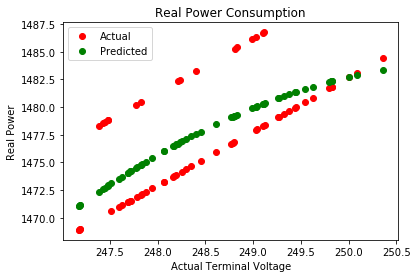

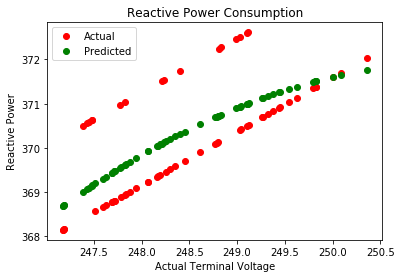

14 to 15


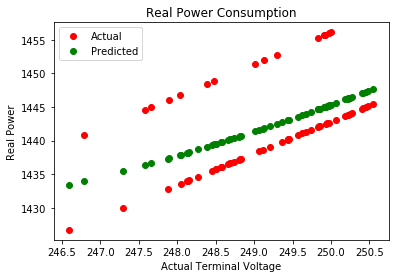

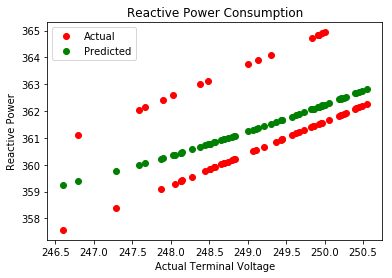

15 to 16


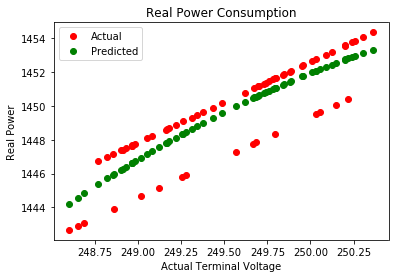

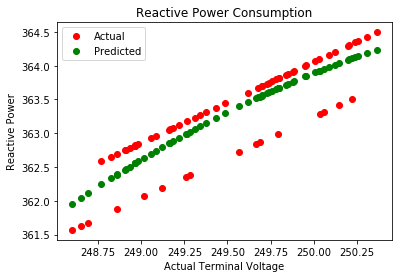

16 to 17


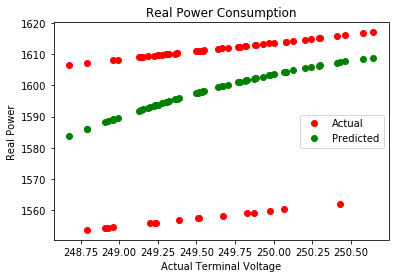

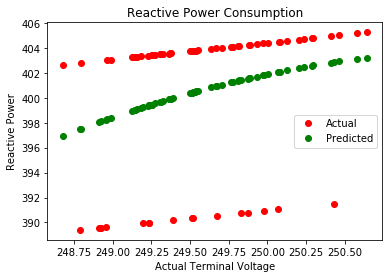

17 to 18


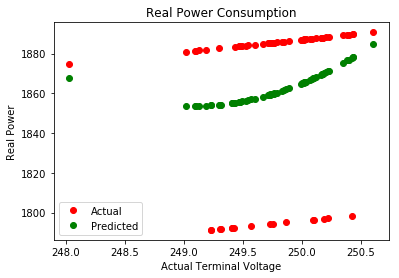

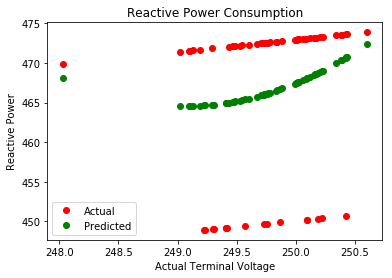

18 to 19


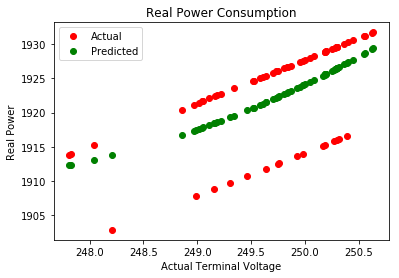

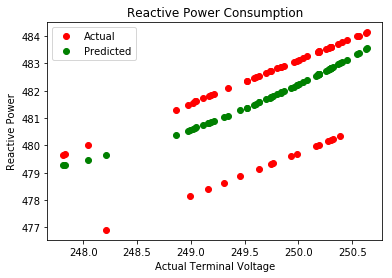

19 to 20


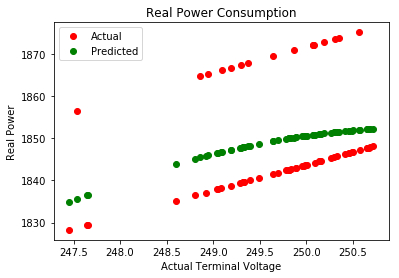

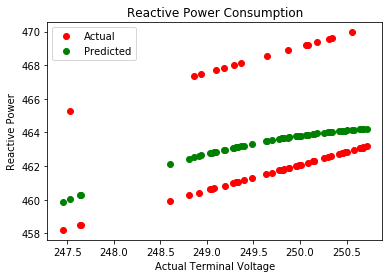

20 to 21


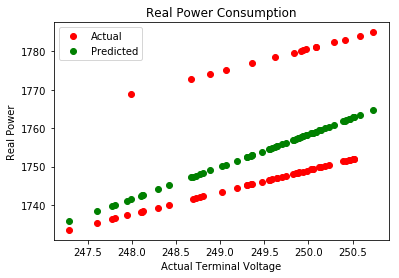

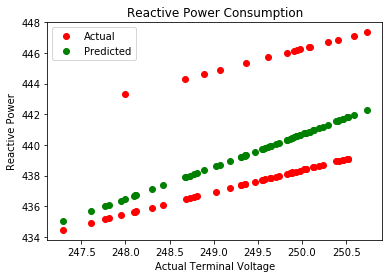

21 to 22


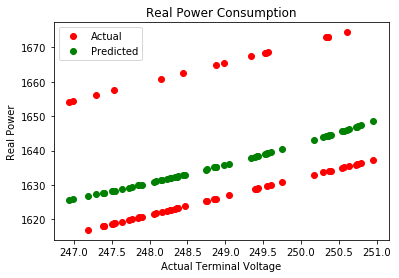

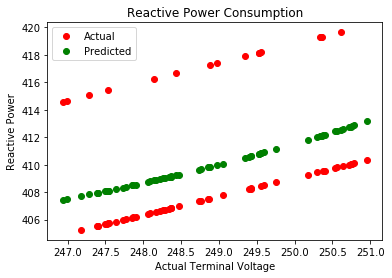

22 to 23


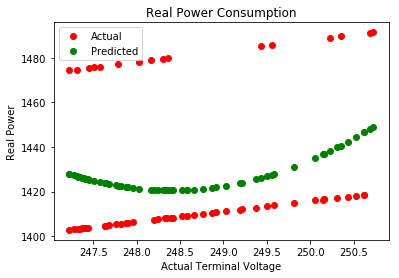

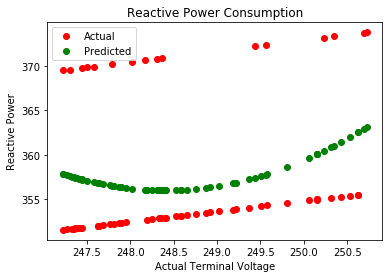

Season  2
2013-03-01
2013-05-15
Weekdays
0 to 1


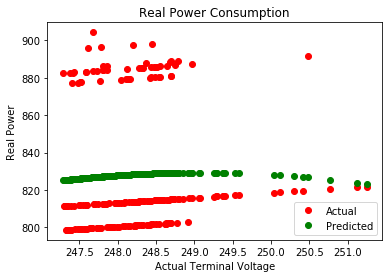

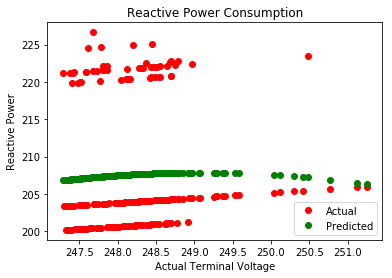

1 to 2


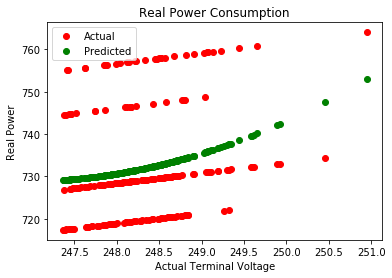

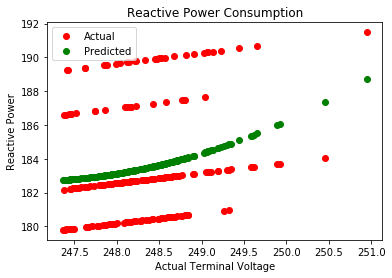

2 to 3


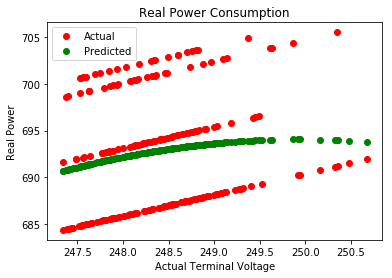

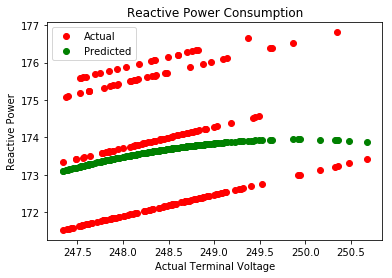

3 to 4


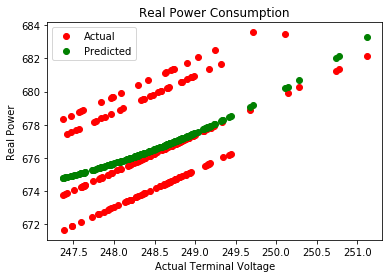

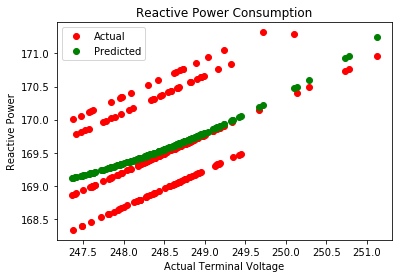

4 to 5


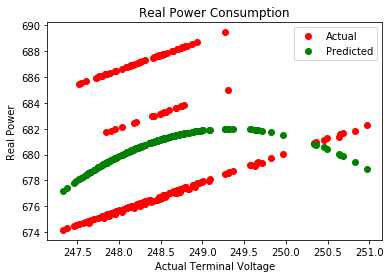

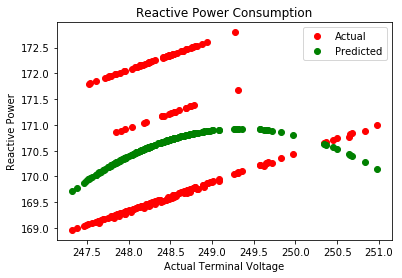

5 to 6


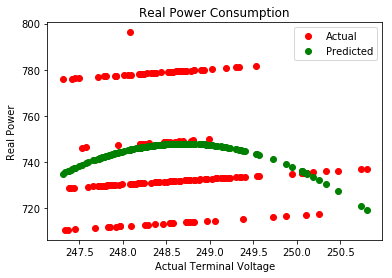

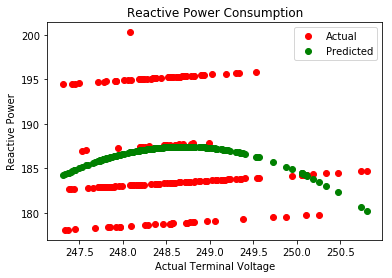

6 to 7


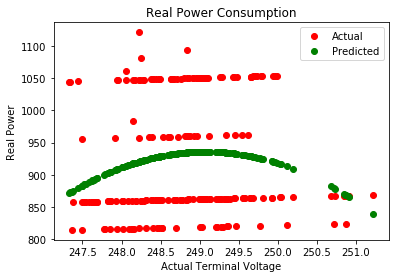

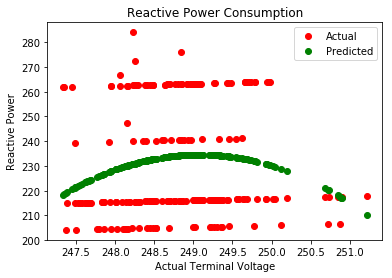

7 to 8


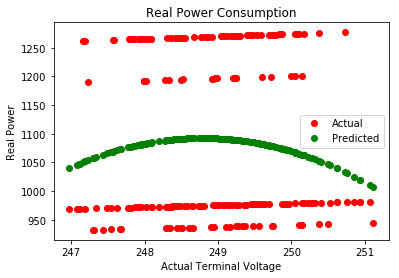

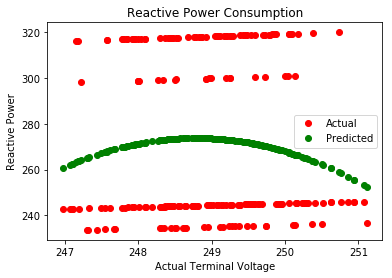

8 to 9


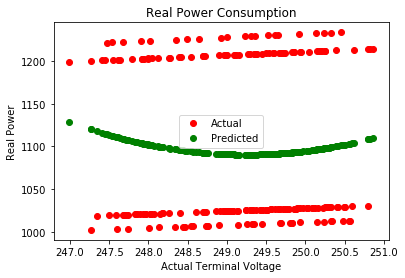

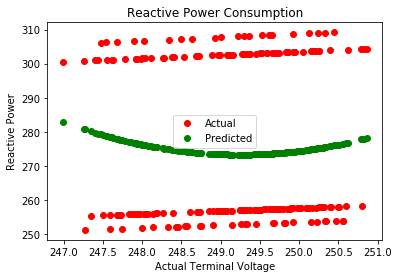

9 to 10


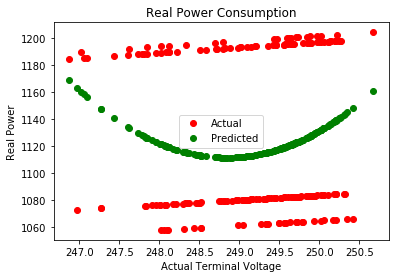

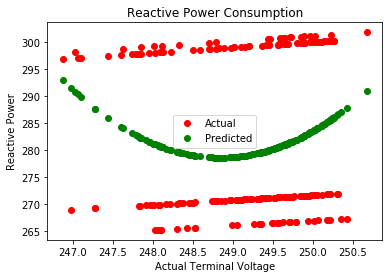

10 to 11


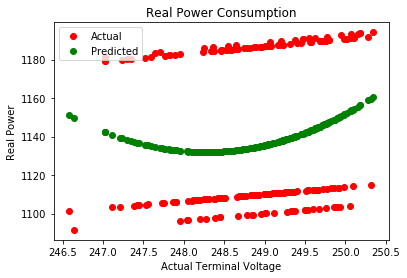

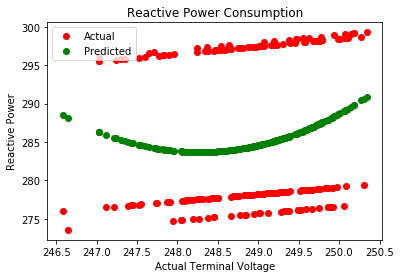

11 to 12


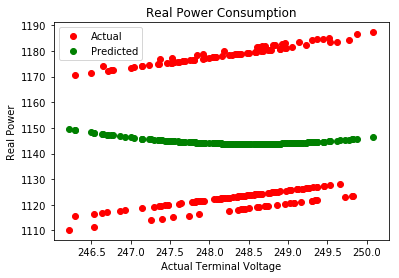

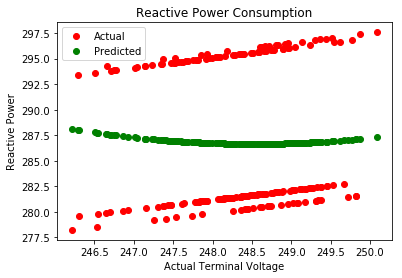

12 to 13


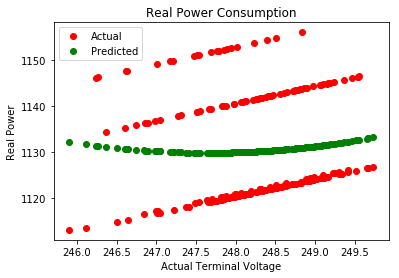

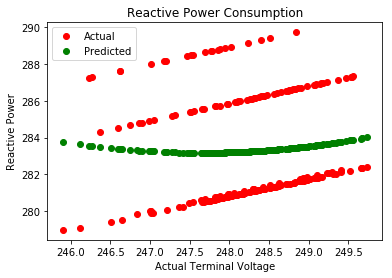

13 to 14


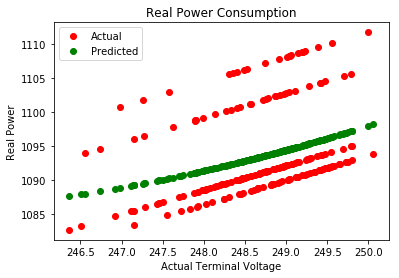

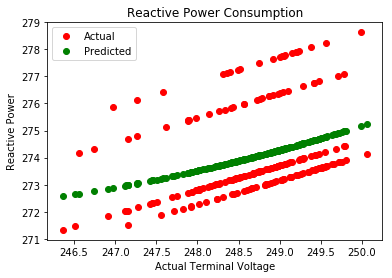

14 to 15


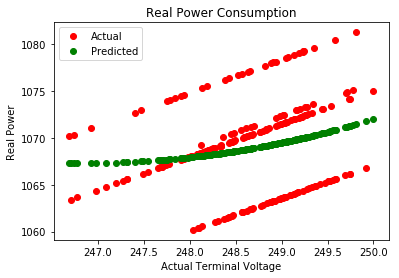

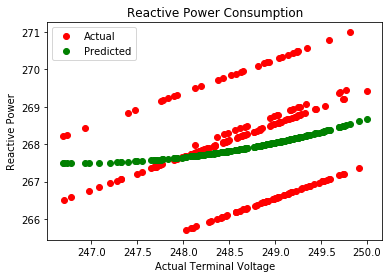

15 to 16


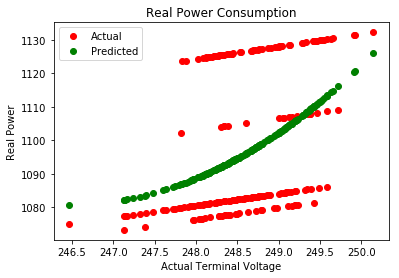

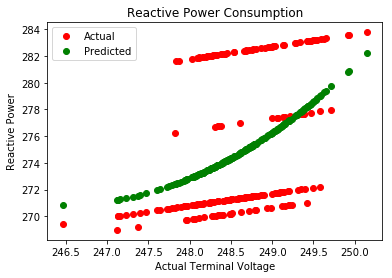

16 to 17


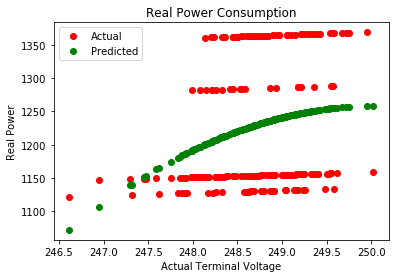

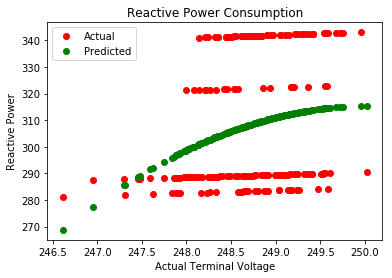

17 to 18


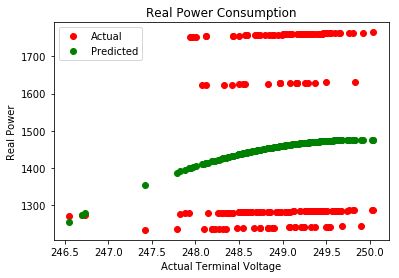

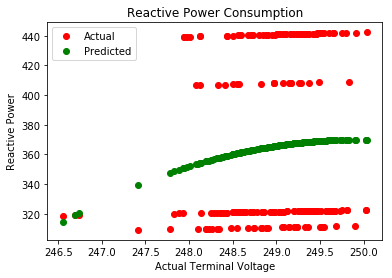

18 to 19


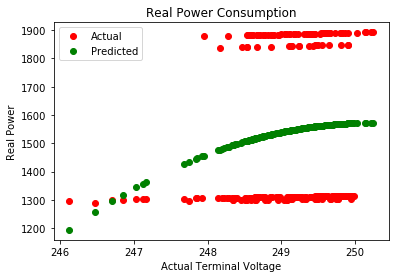

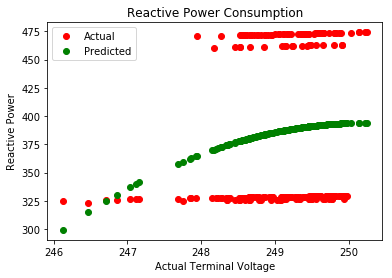

19 to 20


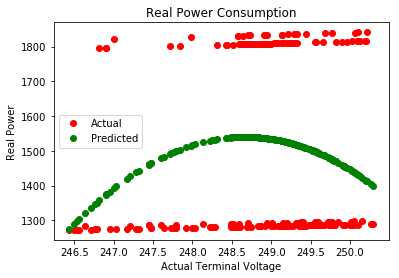

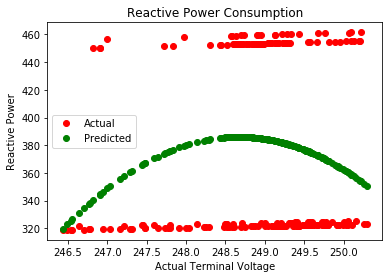

20 to 21


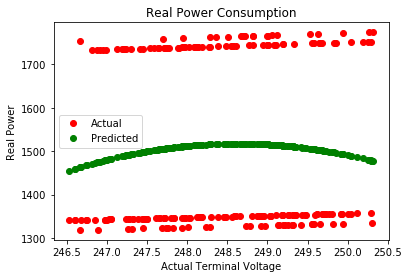

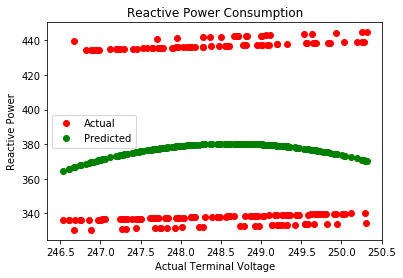

21 to 22


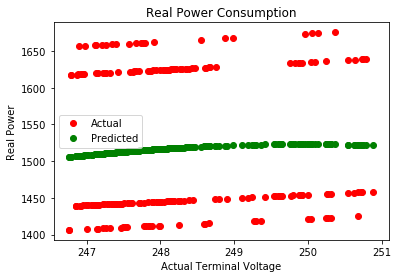

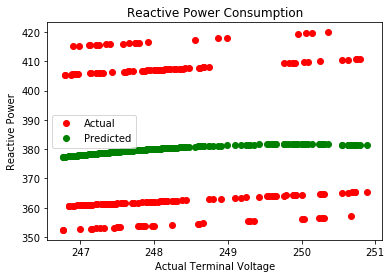

22 to 23


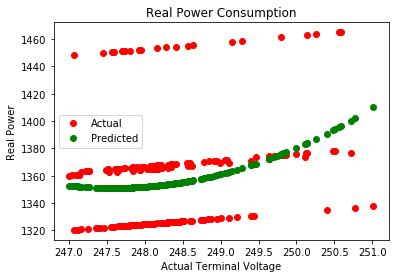

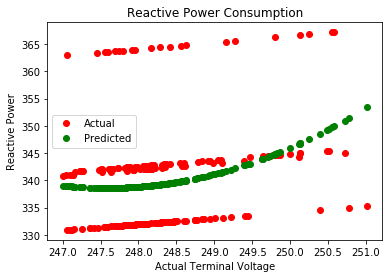

Weekends
0 to 1


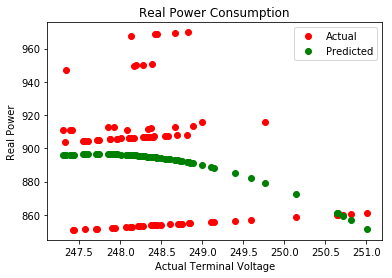

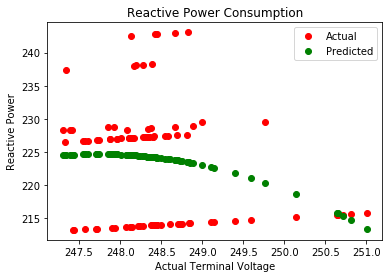

1 to 2


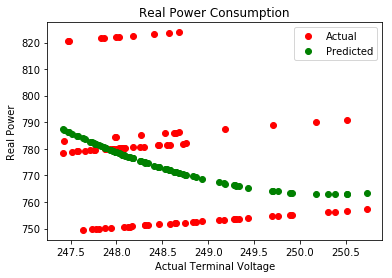

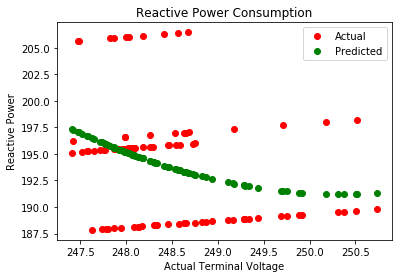

2 to 3


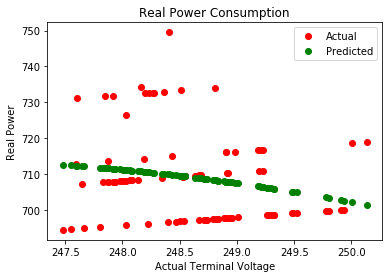

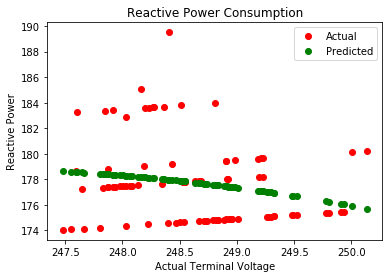

3 to 4


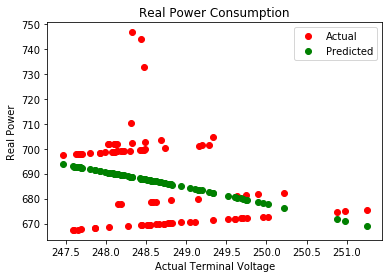

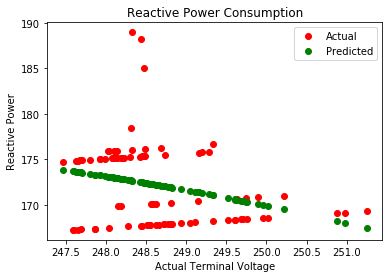

4 to 5


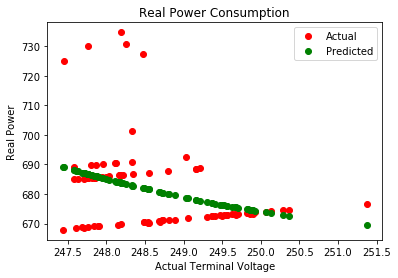

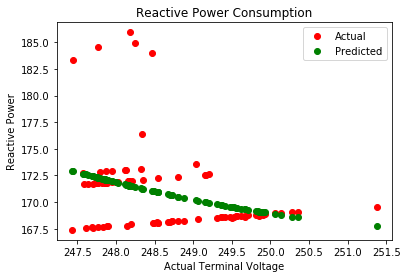

5 to 6


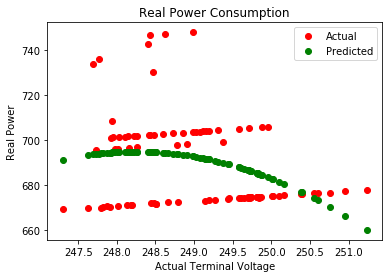

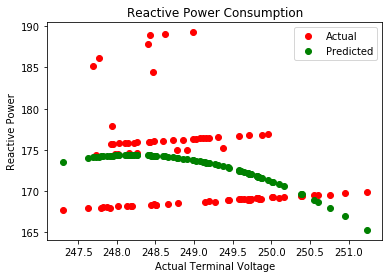

6 to 7


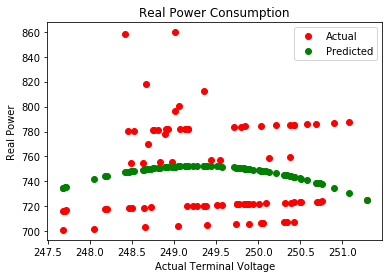

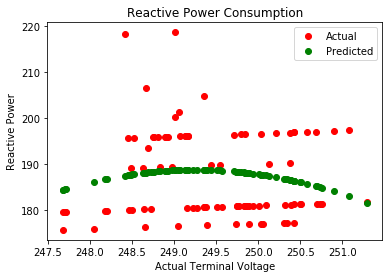

7 to 8


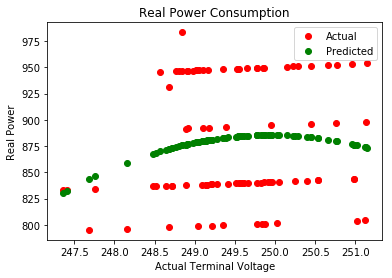

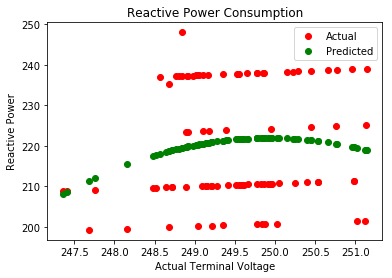

8 to 9


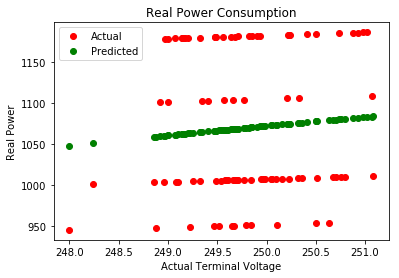

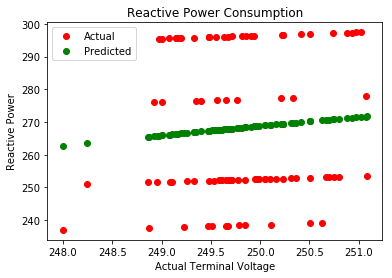

9 to 10


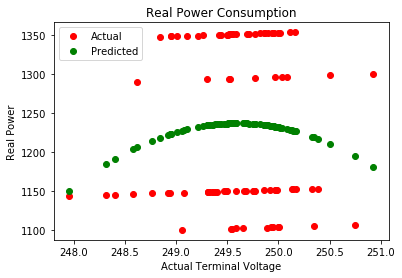

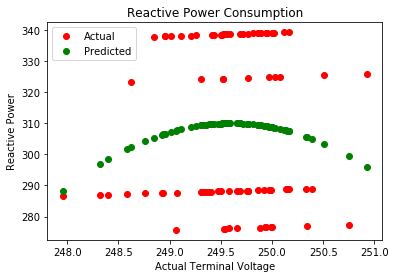

10 to 11


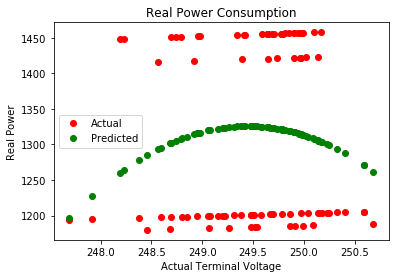

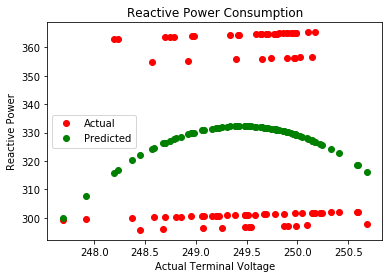

11 to 12


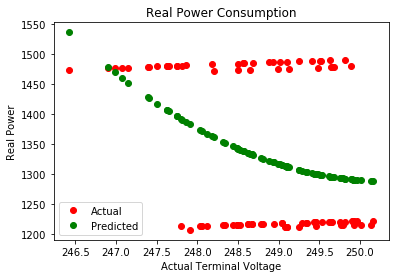

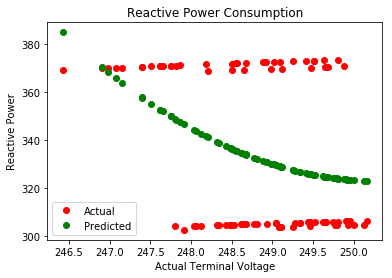

12 to 13


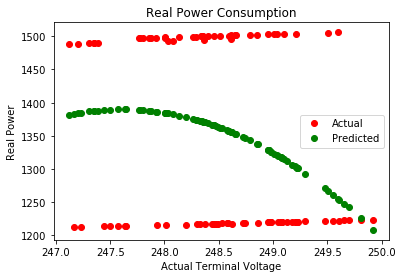

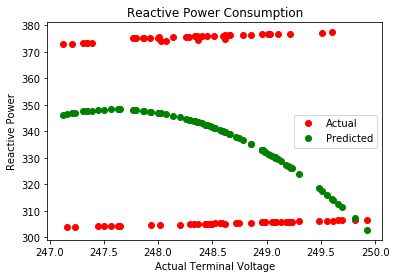

13 to 14


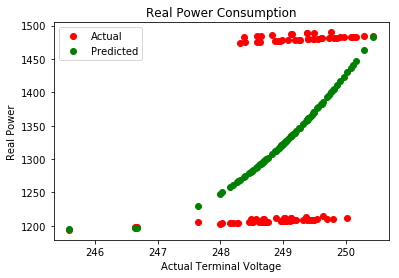

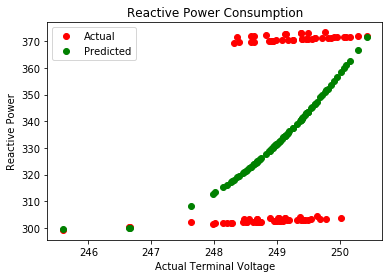

14 to 15


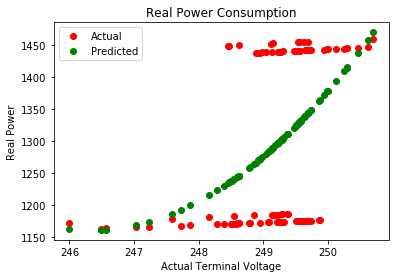

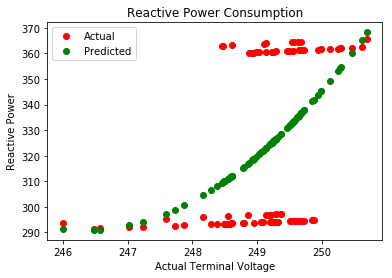

15 to 16


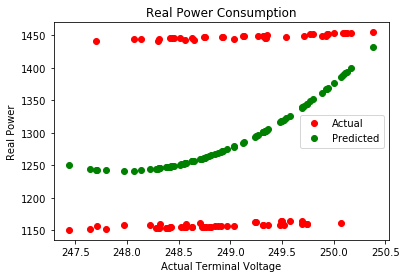

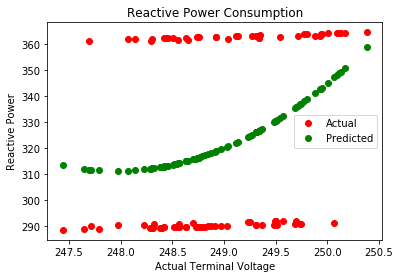

16 to 17


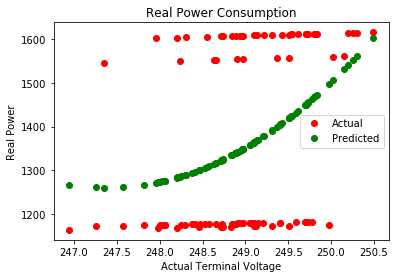

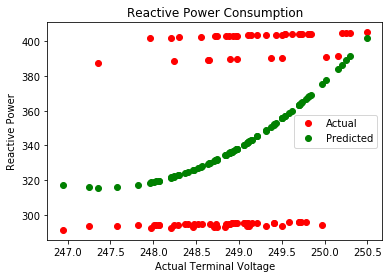

17 to 18


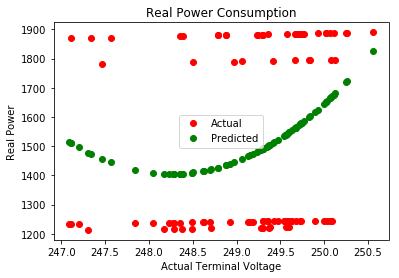

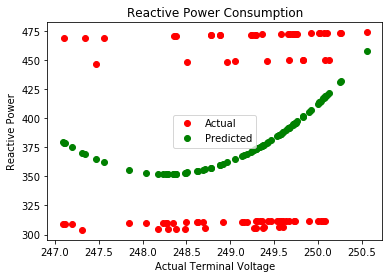

18 to 19


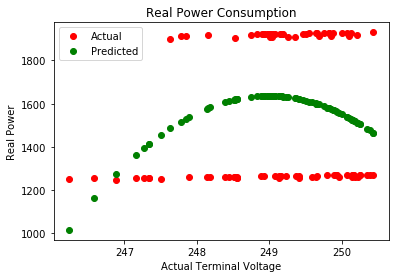

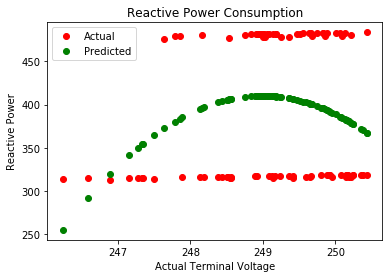

19 to 20


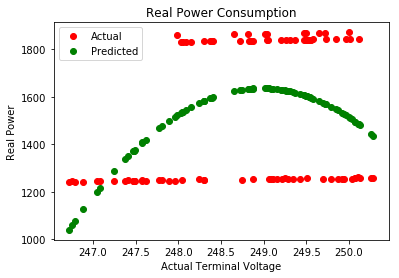

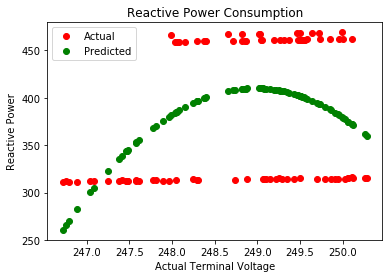

20 to 21


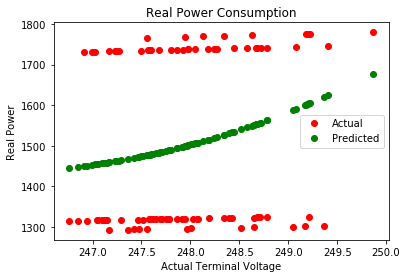

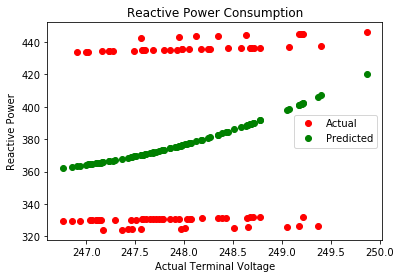

21 to 22


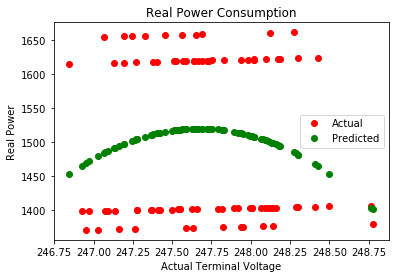

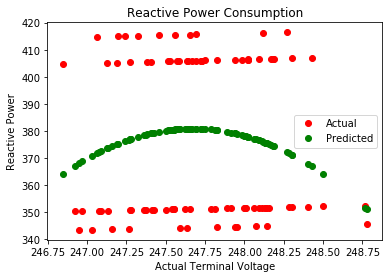

22 to 23


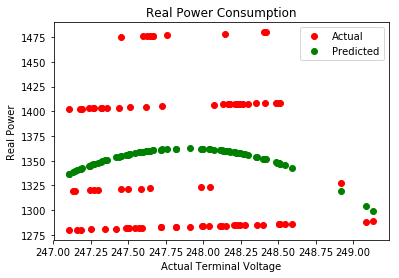

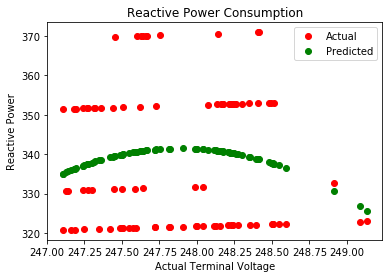

In [338]:
realCoefficients=[]
reactiveCoefficients=[]
hourwindow=1

for j in range(0,len(seasonDates)-1):
    realPowerSeason=realP[seasonDates[j]:seasonDates[j+1]]
    realVoltageSeason=realV[seasonDates[j]:seasonDates[j+1]]
    reactivePowerSeason=reactiveP[seasonDates[j]:seasonDates[j+1]]
    reactiveVoltageSeason=reactiveV[seasonDates[j]:seasonDates[j+1]]
    date_list=getDateList(seasonDates[j],seasonDates[j+1])
    print("Season ",j+1)
    print(seasonDates[j])
    print(seasonDates[j+1])
    #print(date_list)  
    
    for i in (0,1):
        if i==0: #weekdays
            days=[(day.strftime('%Y-%m-%d')) for day in date_list if (day.isoweekday()==1 or day.isoweekday()==2 or day.isoweekday()==3 or day.isoweekday()==4 or day.isoweekday()==5)]
            print("Weekdays")
        else: #weekends
            days=[(day.strftime('%Y-%m-%d')) for day in date_list if (day.isoweekday()==6 or day.isoweekday()==7)]
            print("Weekends")
        
            
        totalrealPower=getDays(realPowerSeason,days)
        totalrealVoltage=getDays(realVoltageSeason,days)
        totalreactivePower=getDays(reactivePowerSeason,days)
        totalreactiveVoltage=getDays(reactiveVoltageSeason,days)
        
        for hr in range(0,23):
            realPower=getHourData(totalrealPower,hourwindow,hr)
            realVoltage=getHourData(totalrealVoltage,hourwindow,hr)
            reactivePower=getHourData(totalreactivePower,hourwindow,hr)
            reactiveVoltage=getHourData(totalreactiveVoltage,hourwindow,hr)
            
            print(hr,"to",hr+hourwindow)
            hr=hr+hourwindow
            apparentVoltage=((realVoltage**2)+(reactiveVoltage**2))**0.5
            apparentPower=((realPower**2)+(reactivePower**2))**0.5
            independentVariable=apparentVoltage/apparentVoltage.mean() # or .median()
    
            columnNames=independentVariable.columns
    
            x=independentVariable[columnNames[1]]
            x=x.values
            
            xaxis=apparentVoltage[columnNames[1]]
            y1=realPower[columnNames[1]]
            y1=y1.values
            
            y2=reactivePower[columnNames[1]]
    
            coeff1=np.polyfit(x,y1,2)
            coeff2=np.polyfit(x,y2,2)
        
            xx= np.linspace(x.min(),x.max(),100)
            xxaxis=np.linspace(xaxis.min(),xaxis.max(),100)

            poly1=np.poly1d(coeff1)
            fid,cx = pyplot.subplots()
    
            cx.plot(xaxis,y1,'ro',label='Actual')
            cx.plot(xaxis,np.polyval(coeff1,x),'go',label='Predicted')

            cx.legend()
            cx.set_title('Real Power Consumption')
            cx.set_xlabel('Actual Terminal Voltage')
            cx.set_ylabel('Real Power')
            pyplot.show()


            poly2=np.poly1d(coeff2)
            fid,cx = pyplot.subplots()

            cx.plot(xaxis,y2,'ro',label='Actual')
            cx.plot(xaxis,np.polyval(coeff2,x),'go',label='Predicted')

            cx.legend()
            cx.set_title('Reactive Power Consumption')
            cx.set_xlabel('Actual Terminal Voltage')
            cx.set_ylabel('Reactive Power')
            pyplot.show()

            realCoefficients.append(coeff1)
            reactiveCoefficients.append(coeff2)
    

In [ ]:
#realCoefficients
#reactiveCoefficients